In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import sqlite3 as db
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [3]:
df=pd.read_csv('keendata.csv',header=0)
df.head()

Timestamp  StatusCode  Distance  SignalQuality  \
0  2020-01-09 04:28:36 UTC           0  1.371346             10   
1  2020-01-09 03:55:49 UTC           1  1.179895             10   
2  2020-01-09 04:18:28 UTC           0  1.321801             10   
3  2020-01-09 04:30:54 UTC           0  1.183270             10   
4  2020-01-09 04:58:16 UTC           0  1.159226             10   

   RespirationRate  MovementSlow  MovementFast  DetectionCount  \
0        11.425139     17.174753      0.000000               1   
1         0.000000     52.125374     10.024010               1   
2        15.054924     28.574495      0.000000               1   
3        19.713951     51.620869     11.764706               1   
4        17.211555     60.186775     29.561825               1   

          PatientID  thermalPresence                   DateTime  weekday  \
0  5708323928145920                0  2020-01-09 04:28:36+00:00        4   
1  5708323928145920                0  2020-01-09 03:55:49+00:00        4   
2  5708323928145920                0  2020-01-09 04:18:28+00:00        4   
3  5708323928145920                0  2020-01-09 04:30:54+00:00        4   
4  5708323928145920                0  2020-01-09 04:58:16+00:00        4   

         Date      Time   Mins  Hours              DMins          Dhours  
0  2020-01-09  04:28:36  04:28      4  2020-Jan-09 04:28  2020-Jan-09 04  
1  2020-01-09  03:55:49  03:55      3  2020-Jan-09 03:55  2020-Jan-09 03  
2  2020-01-09  04:18:28  04:18      4  2020-Jan-09 04:18  2020-Jan-09 04  
3  2020-01-09  04:30:54  04:30      4  2020-Jan-09 04:30  2020-Jan-09 04  
4  2020-01-09  04:58:16  04:58      4  2020-Jan-09 04:58  2020-Jan-09 04

In [3]:
#df=df.replace({'Monday':1, 'Saturday':6, 'Sunday':7, 'Thursday':4, 'Tuesday':2, 'Wednesday':3,'Friday':5})

In [4]:
df.head(1)

Timestamp  StatusCode  Distance  SignalQuality  \
0  2020-01-09 04:28:36 UTC           0  1.371346             10   

   RespirationRate  MovementSlow  MovementFast  DetectionCount  \
0        11.425139     17.174753           0.0               1   

          PatientID  thermalPresence                   DateTime  weekday  \
0  5708323928145920                0  2020-01-09 04:28:36+00:00        4   

         Date      Time   Mins  Hours              DMins          Dhours  
0  2020-01-09  04:28:36  04:28      4  2020-Jan-09 04:28  2020-Jan-09 04

In [5]:
import csv
#df.to_csv (r'C:\Users\chunxiacao\keenly\keendata.csv', index = None, header=True)

#df=pd.read_csv('keendata.csv',header=0)


In [6]:
len(df[df['StatusCode'] == 0])/42252225

0.18200745641205876

In [7]:
len(df[df['StatusCode'] == 1])/42252225

0.057928925636460564

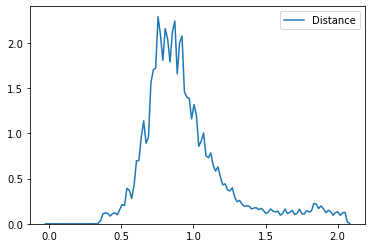

In [366]:
sns.kdeplot(df['Distance'])

In [6]:
conn = db.connect('df_trial.db')
#c = conn.cursor()
df.to_sql('df', conn, if_exists='replace', index=False)
pd.read_sql_query('SELECT * FROM df LIMIT 2', conn)

Timestamp  StatusCode  Distance  SignalQuality  \
0  2020-01-09 04:28:36 UTC           0  1.371346             10   
1  2020-01-09 03:55:49 UTC           1  1.179895             10   

   RespirationRate  MovementSlow  MovementFast  DetectionCount  \
0        11.425139     17.174753       0.00000               1   
1         0.000000     52.125374      10.02401               1   

          PatientID  thermalPresence                   DateTime  weekday  \
0  5708323928145920                0  2020-01-09 04:28:36+00:00        4   
1  5708323928145920                0  2020-01-09 03:55:49+00:00        4   

         Date      Time   Mins  Hours              DMins          Dhours  
0  2020-01-09  04:28:36  04:28      4  2020-Jan-09 04:28  2020-Jan-09 04  
1  2020-01-09  03:55:49  03:55      3  2020-Jan-09 03:55  2020-Jan-09 03

In [9]:
#melt table
def melt(dataframe, col_vals, key, value):
    assert type(dataframe) is pd.DataFrame
    ### BEGIN SOLUTION
    keep_vars = dataframe.columns.difference(col_vals)
    melted_sections = []
    for c in col_vals:
        melted_c = dataframe[keep_vars].copy()
        melted_c[key] = c
        melted_c[value] = dataframe[c]
        melted_sections.append(melted_c)
    melted = pd.concat(melted_sections)
    return melted
    ### END SOLUTION

In [45]:
set(df['PatientID'])

{5634263223369728,
 5634999273390080,
 5640060892348416,
 5649050225344512,
 5655638436741120,
 5661232933634048,
 5664378560970752,
 5668600916475904,
 5670794235478016,
 5670864666230784,
 5674053578784768,
 5678164130922496,
 5680680545550336,
 5689413791121408,
 5702797177651200,
 5708323928145920,
 5709989402378240,
 5715233054130176,
 5717994718101504,
 5721589337292800,
 5736697924943872,
 5740379684995072,
 5741031244955648,
 5746055551385600,
 5750197846016000,
 5756989665705984}

In [8]:
query = '''
    select  PatientID, weekday, round(avg(MovementFast), 2) as weekdayMovementFast, round(avg(MovementSlow), 2) as weekdayMovementSlow    
    from df
    where StatusCode=1
    group by PatientID,weekday
    order by PatientID,weekday
'''
dfmfweekday0 = pd.read_sql_query (query, conn)


query = '''
    select  PatientID, weekday, round(avg(RespirationRate), 2) as weekdayRespirationRate
    
    from df
    where StatusCode=0
    group by PatientID,weekday
    order by PatientID,weekday
'''
dfrweekday0 = pd.read_sql_query (query, conn)

dfcastweekday=dfmfweekday0.merge(dfrweekday0, on =['PatientID','weekday'])
dfcastweekday.head(2)

PatientID  weekday  weekdayMovementFast  weekdayMovementSlow  \
0  5634263223369728        1                 9.73                40.28   
1  5634263223369728        2                 7.59                36.72   

   weekdayRespirationRate  
0                   19.01  
1                   18.30

00:00:56.14


<Figure size 7200x7200 with 0 Axes>

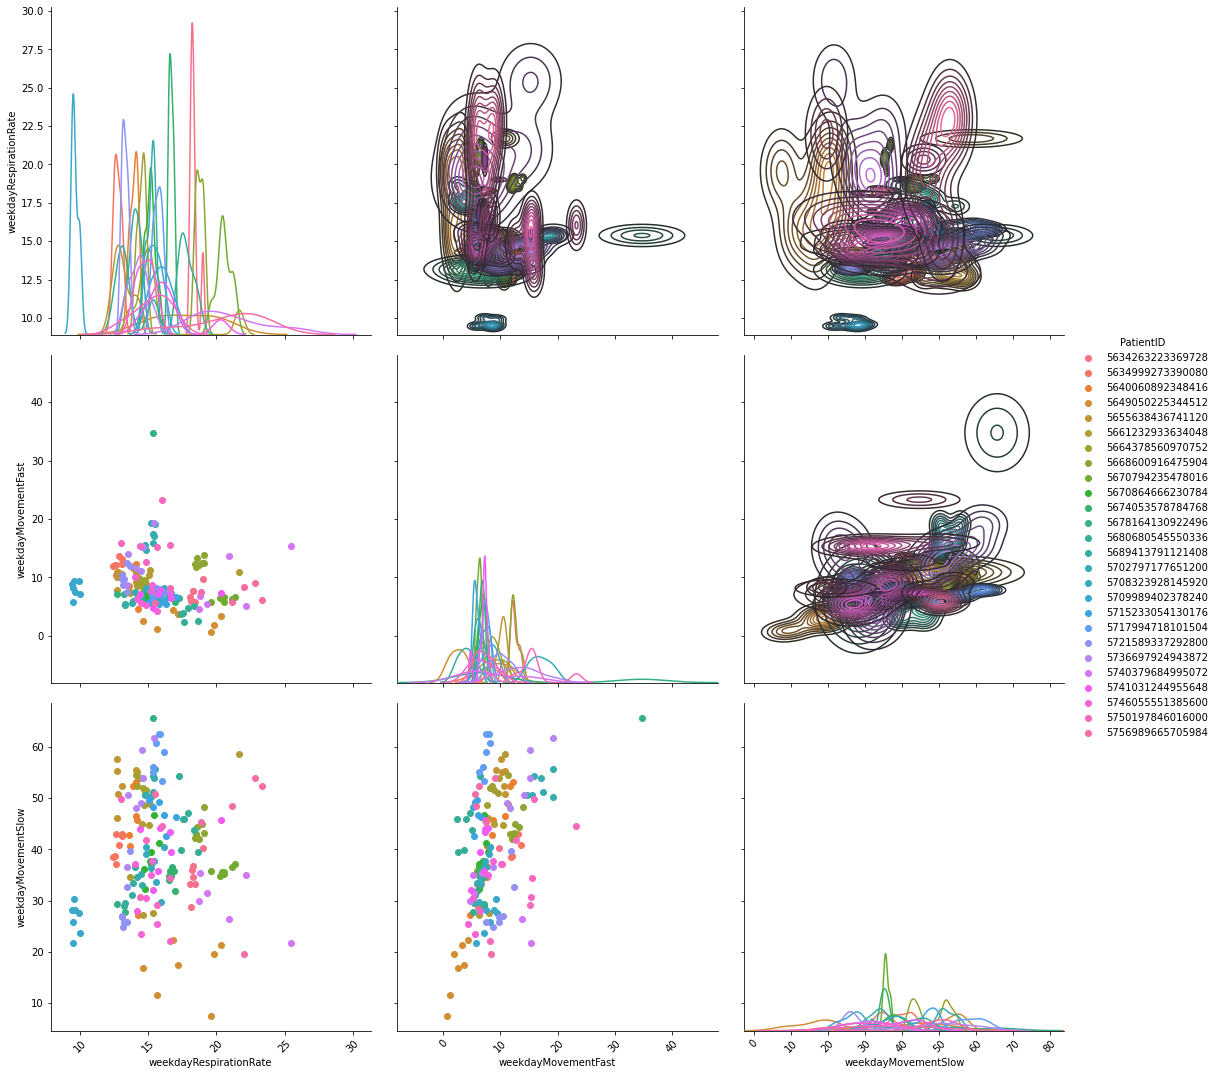

In [15]:
numerical =['weekdayRespirationRate', 'weekdayMovementFast', 'weekdayMovementSlow']
start = time.time()
plt.figure(figsize = (100,100))
g = sns.PairGrid(dfcastweekday, vars=dfcastweekday[numerical], hue="PatientID",height=5, aspect=1) 
g.map_upper(sns.kdeplot) 
g.map_lower(plt.scatter) 
g.map_diag(sns.kdeplot) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_sqlmeanbydate.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [16]:
m_dfcastweekday = melt(dfcastweekday, col_vals=['weekdayMovementFast', 'weekdayMovementSlow',
       'weekdayRespirationRate'], key='indx', value='val')

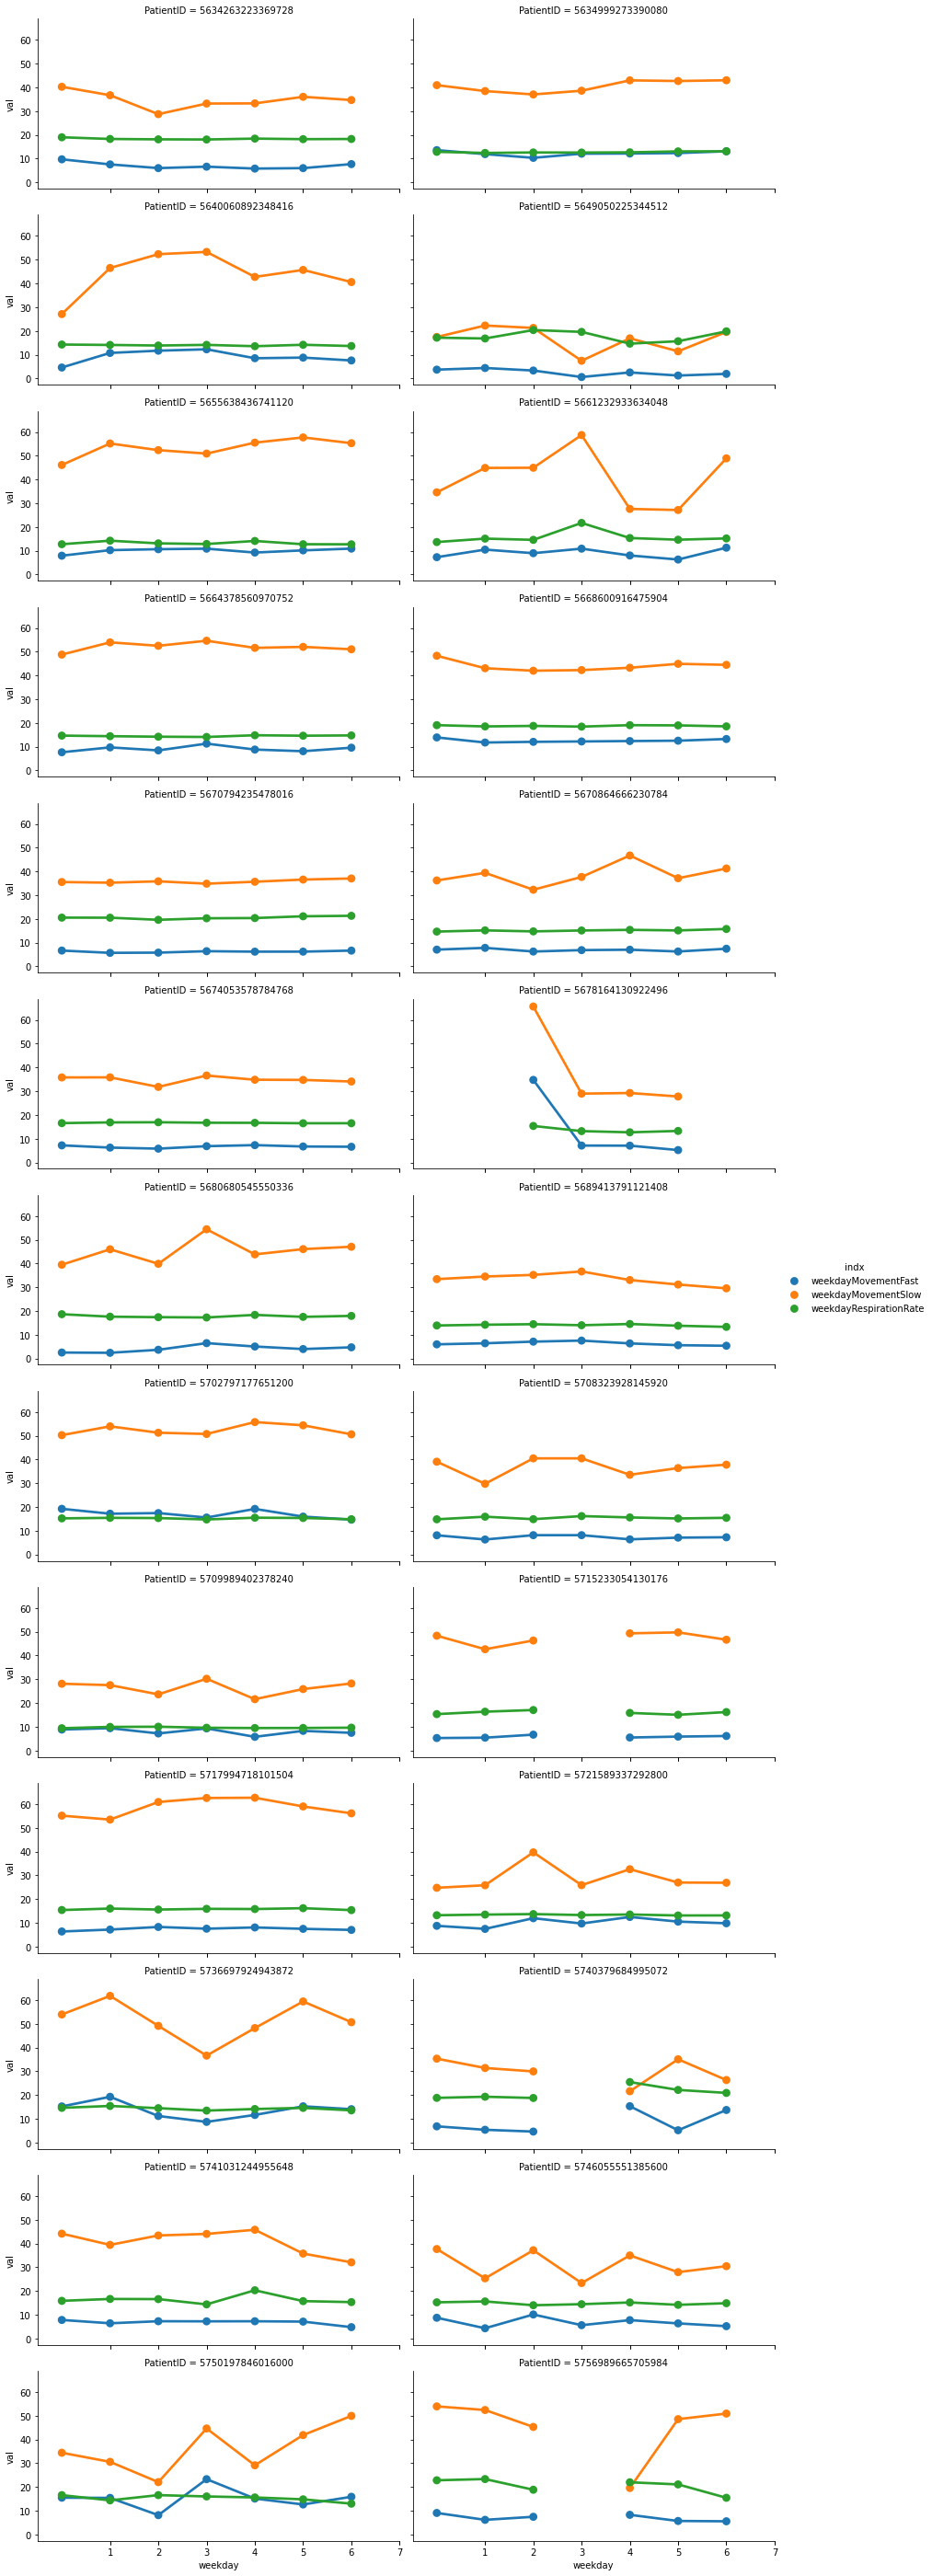

In [17]:
g = sns.catplot(x="weekday", y='val',hue='indx',height=3, aspect=2,
              col="PatientID", data=m_dfcastweekday,col_wrap=2, kind="point")
g.set(xticks=m_dfcastweekday.loc[m_dfcastweekday['PatientID'] == 5634263223369728, 'weekday'].values)

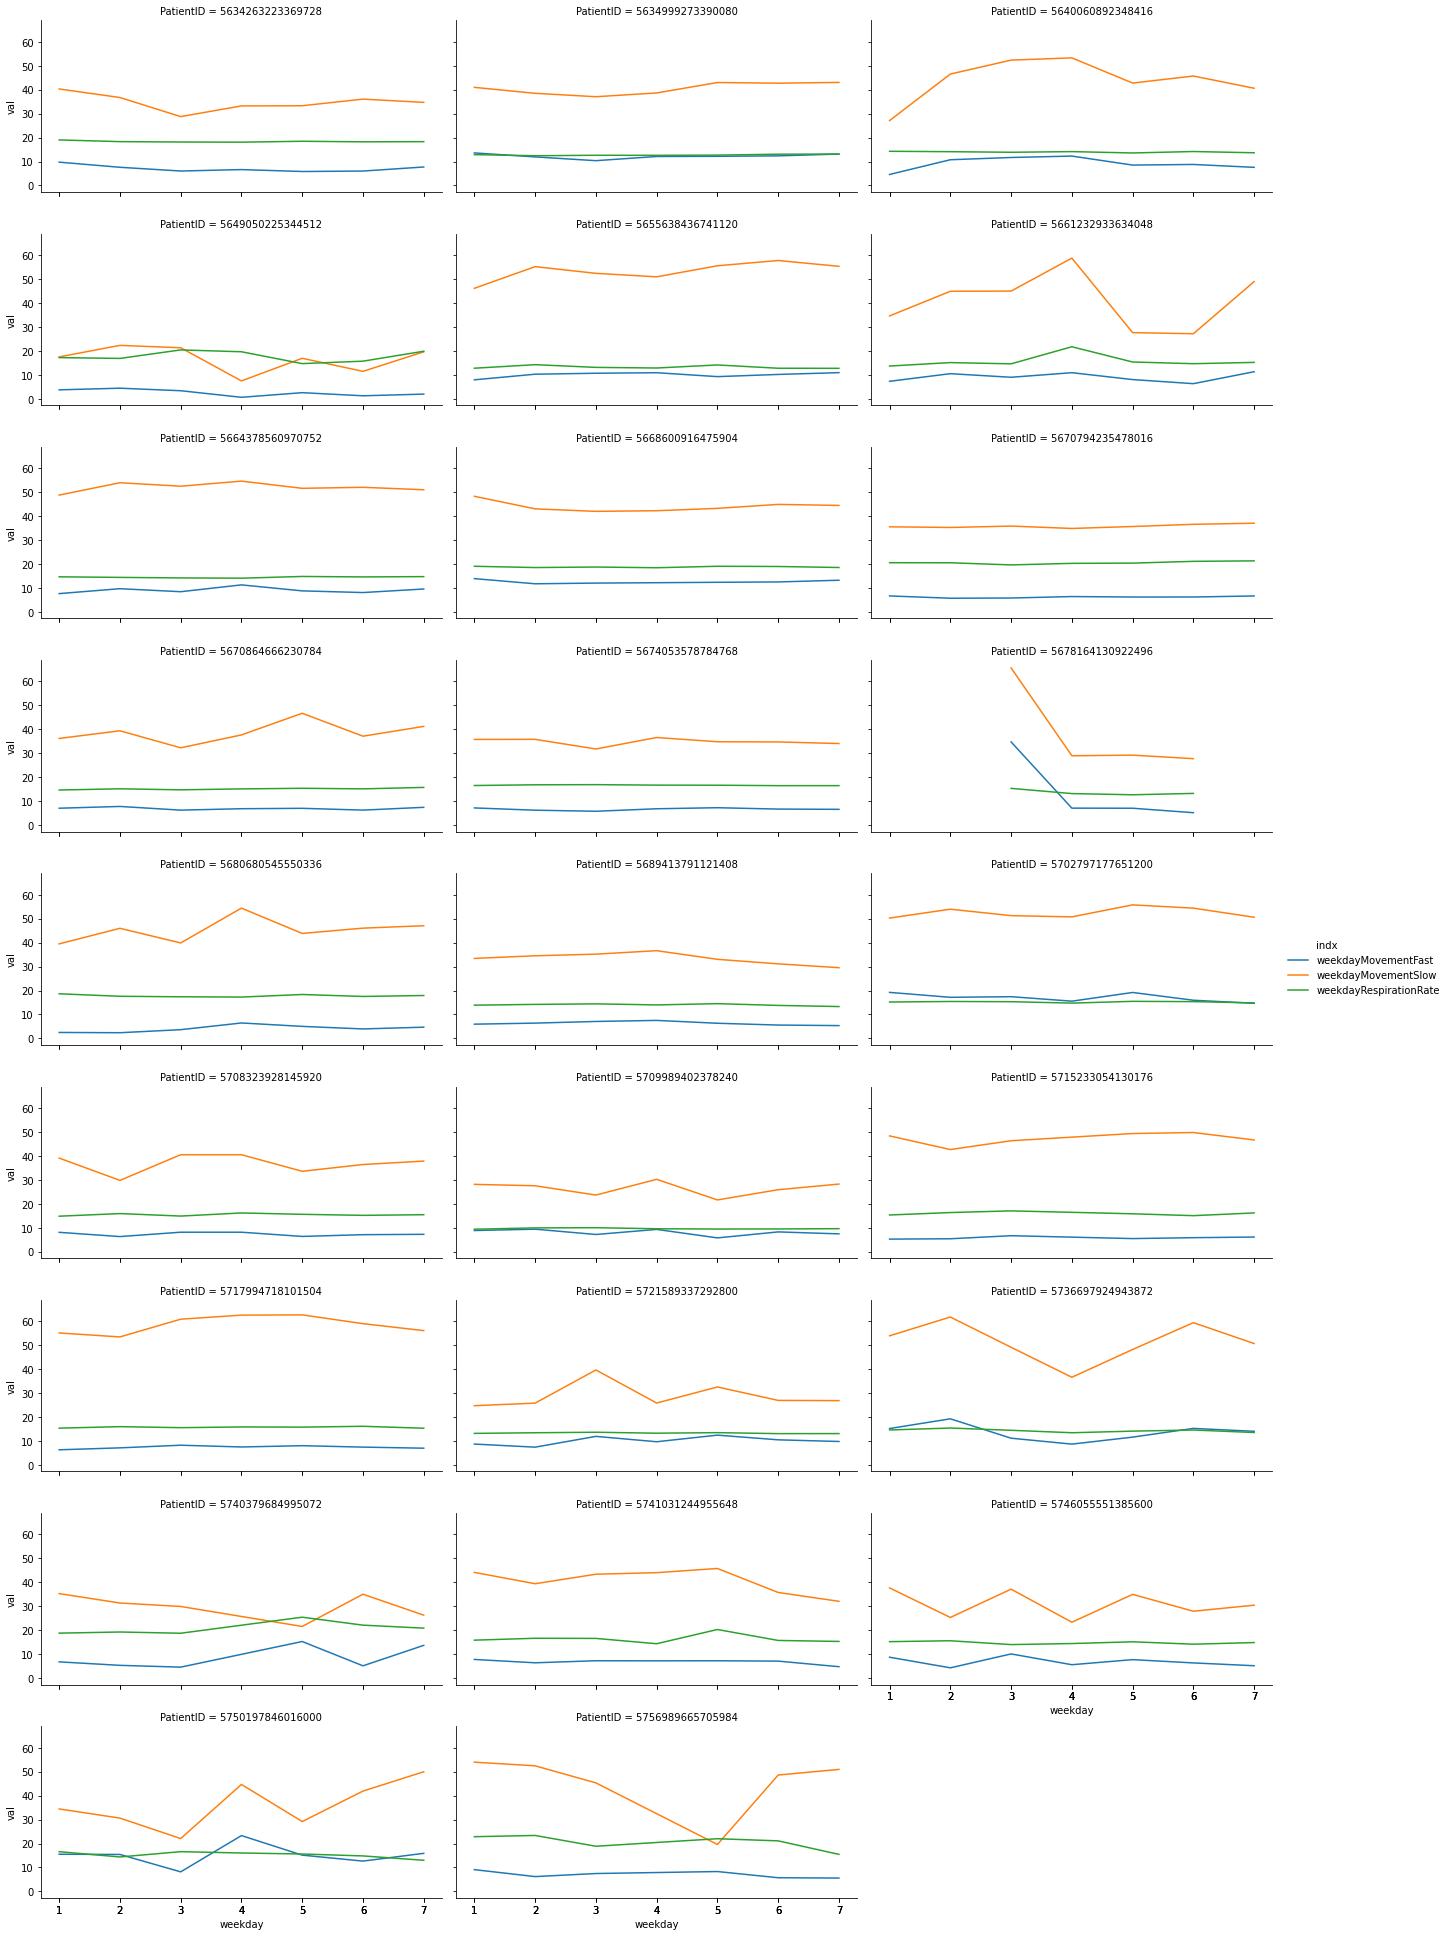

In [20]:
g=sns.relplot(x="weekday", y='val',hue='indx',height=3, aspect=2,
              col="PatientID", data=m_dfcastweekday,col_wrap=3, kind="line")
g.set(xticks=m_dfcastweekday.loc[m_dfcastweekday['PatientID'] == 5634263223369728, 'weekday'].values)

In [21]:
query = '''
    select  PatientID, Date, round(avg(MovementFast), 2) as DateMovementFast, round(avg(MovementSlow), 2) as DateMovementSlow    
    from df
    where StatusCode=1
    group by PatientID,Date
    order by PatientID,Date
'''
dfmfDate0 = pd.read_sql_query (query, conn)


query = '''
    select  PatientID, Date, round(avg(RespirationRate), 2) as DateRespirationRate
    
    from df
    where StatusCode=0
    group by PatientID,Date
    order by PatientID,Date
'''
dfrDate0 = pd.read_sql_query (query, conn)

dfcastdate=dfmfDate0.merge(dfrDate0, on =['PatientID','Date'])
dfcastdate.head(2)

PatientID        Date  DateMovementFast  DateMovementSlow  \
0  5634263223369728  2019-12-21             13.72             46.49   
1  5634263223369728  2019-12-22              7.81             32.89   

   DateRespirationRate  
0                19.60  
1                17.08

In [361]:
dfcastdate.columns

Index(['PatientID', 'Date', 'DateMovementFast', 'DateMovementSlow',
       'DateRespirationRate'],
      dtype='object')

00:00:57.29


<Figure size 7200x7200 with 0 Axes>

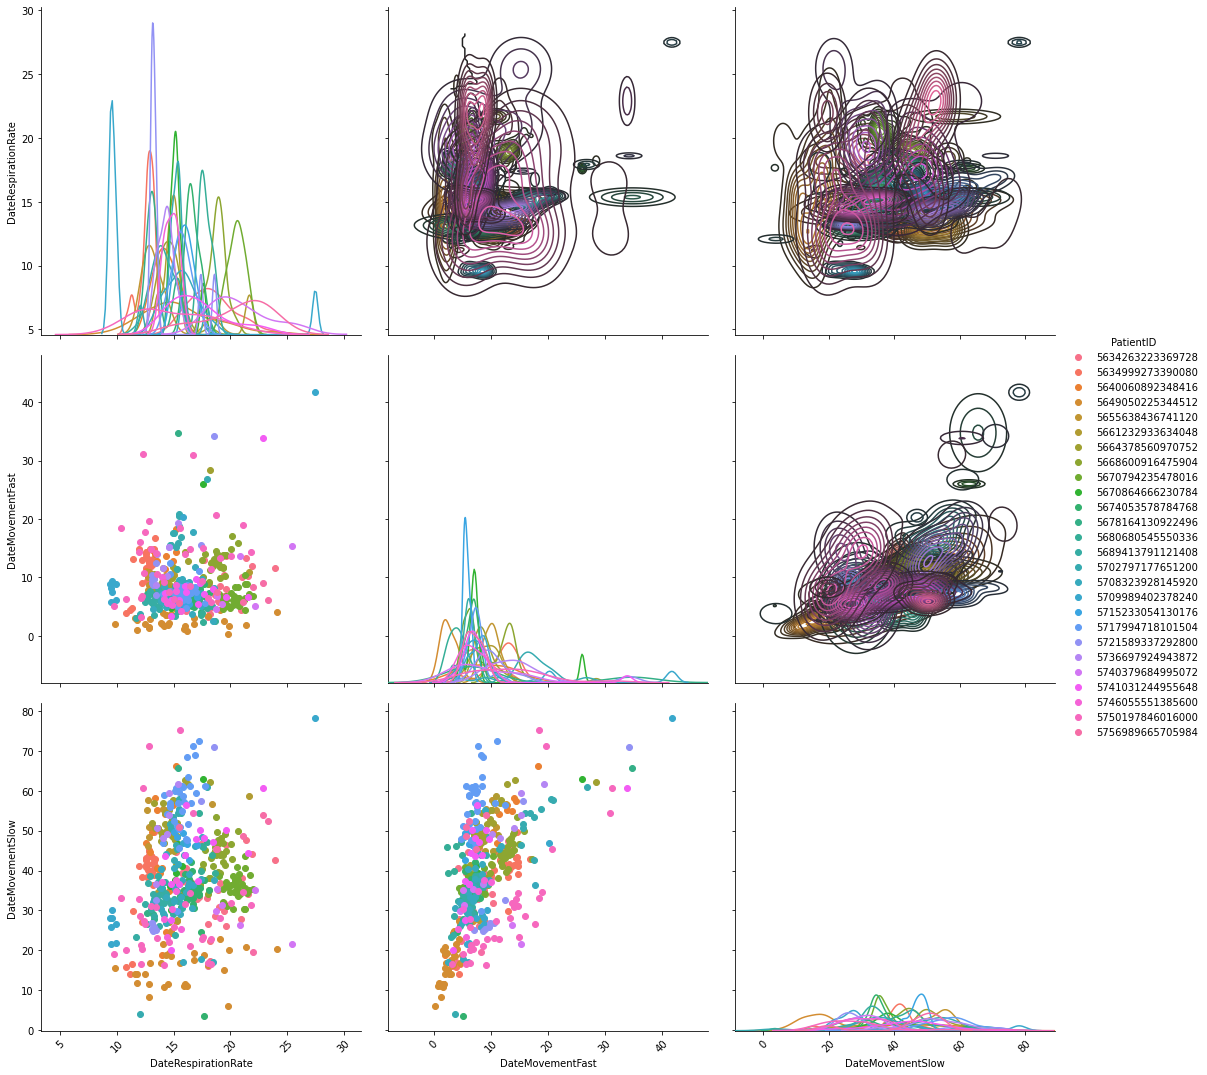

In [22]:
numerical =['DateRespirationRate','DateMovementFast', 'DateMovementSlow' ]
start = time.time()
plt.figure(figsize = (100,100))
g = sns.PairGrid(dfcastdate, vars=dfcastdate[numerical], hue="PatientID",height=5, aspect=1) 
g.map_upper(sns.kdeplot) 
g.map_lower(plt.scatter) 
g.map_diag(sns.kdeplot) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_sqlmeanbydate.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

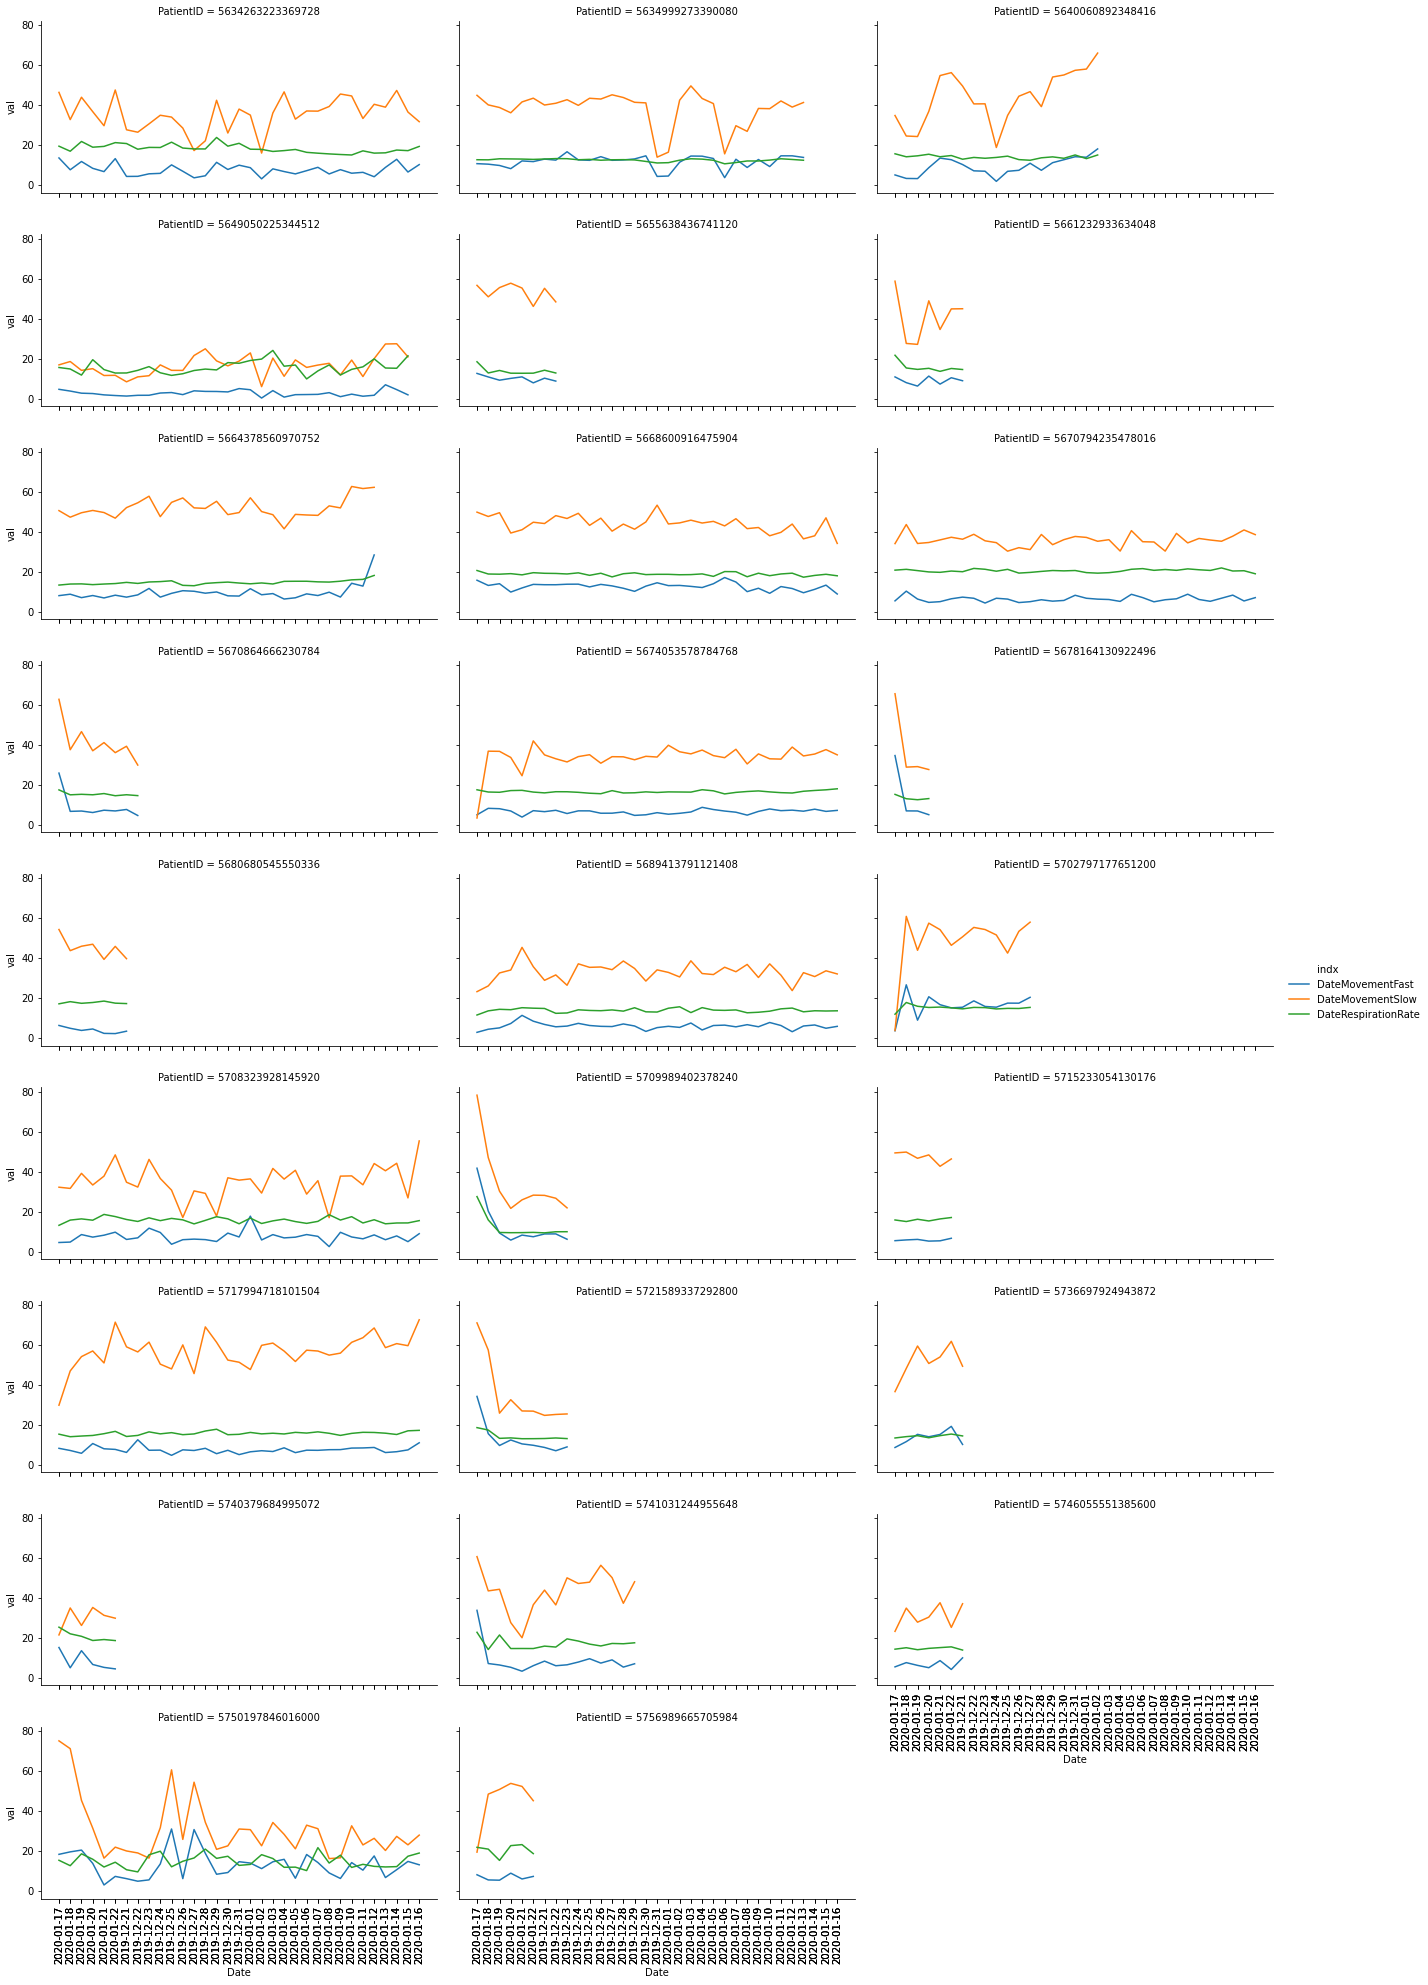

In [30]:
m_dfcastdate = melt(dfcastdate, col_vals=['DateMovementFast', 'DateMovementSlow',
       'DateRespirationRate'], key='indx', value='val')


g=sns.relplot(x="Date", y='val',hue='indx',height=3, aspect=2,
              col="PatientID", data=m_dfcastdate,col_wrap=3, kind="line").set(xticks=m_dfcastdate.loc[m_dfcastdate['PatientID'] == 5634263223369728, 'Date'].values)
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=90)

In [343]:
query = '''
    select  PatientID, Dhours, round(avg(RespirationRate), 2) as RespirationRate
    
    from df
    where StatusCode=0
    group by PatientID,Dhours
    order by PatientID,Dhours
'''
dfmDhours = pd.read_sql_query (query, conn)

query = '''
    select  PatientID, Dhours,  round(avg(MovementSlow), 2) as MovementSlow, round(avg(MovementFast), 2) as MovementFast
    
    from df
    where StatusCode=1
    group by PatientID,Dhours
    order by PatientID,Dhours
'''
dfrDhours = pd.read_sql_query (query, conn)

dfDhours= dfrDhours.merge(dfmDhours, on= ['PatientID','Dhours'])

In [345]:
dfDhours.head(2)

PatientID          Dhours  MovementSlow  MovementFast  \
0  5634263223369728  2019-Dec-21 20          6.64          2.49   
1  5634263223369728  2019-Dec-21 21          8.42          2.90   

   RespirationRate  
0            27.80  
1            27.74

00:01:17.23


<Figure size 7200x7200 with 0 Axes>

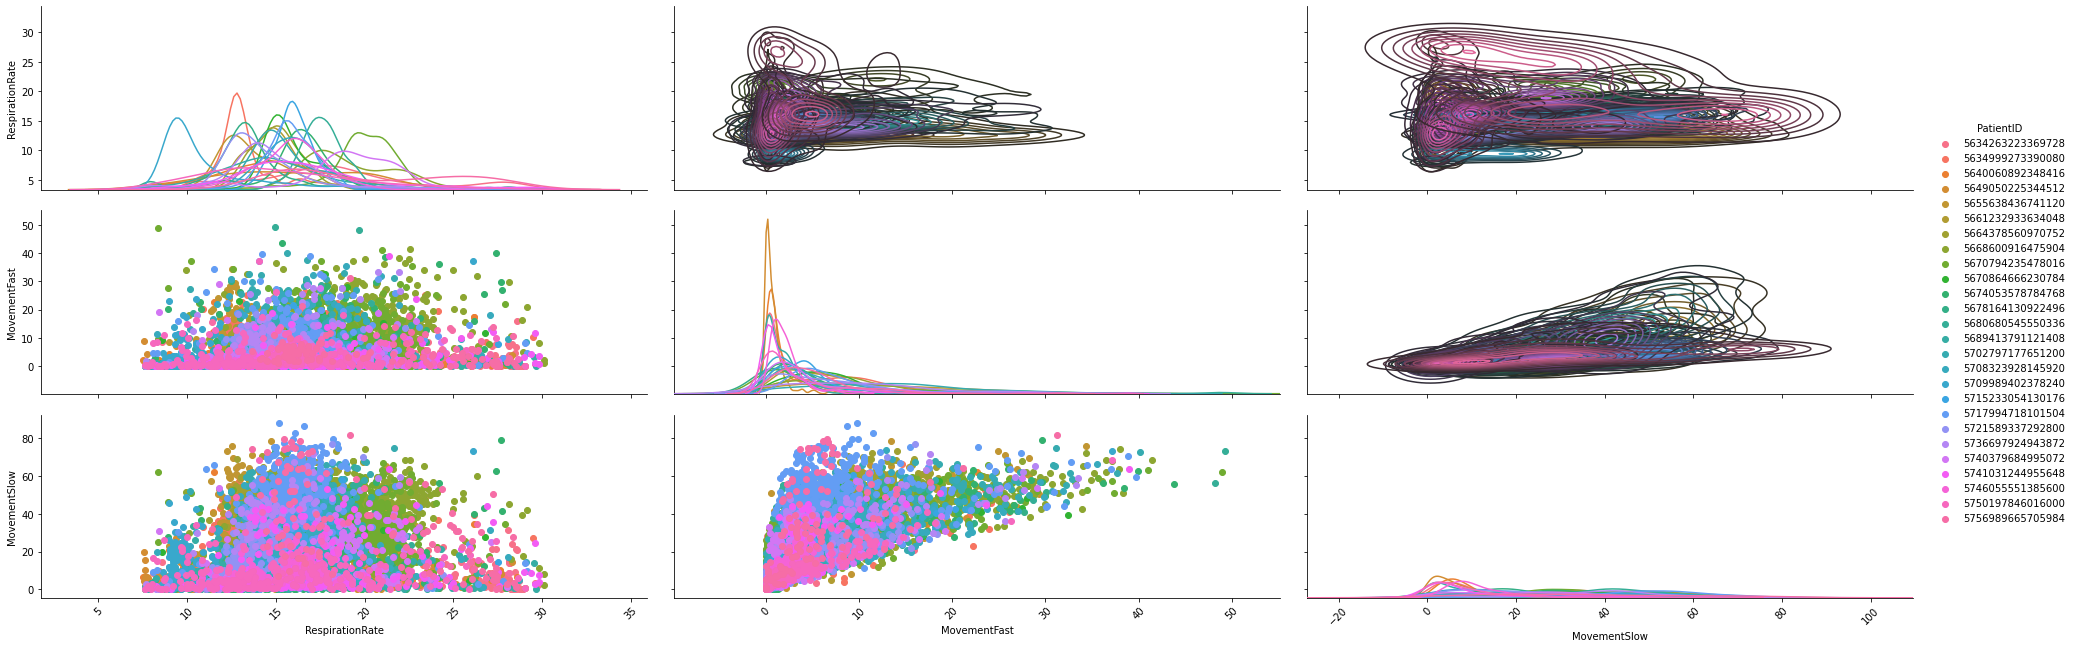

In [369]:
numerical =['RespirationRate', 'MovementFast','MovementSlow']
start = time.time()
plt.figure(figsize = (100,100))
g = sns.PairGrid(dfDhours, vars=dfDhours[numerical], hue="PatientID",height=5, aspect=1) 
g.map_upper(sns.kdeplot) 
g.map_lower(plt.scatter) 
g.map_diag(sns.kdeplot) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_sqlmeanbydate.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

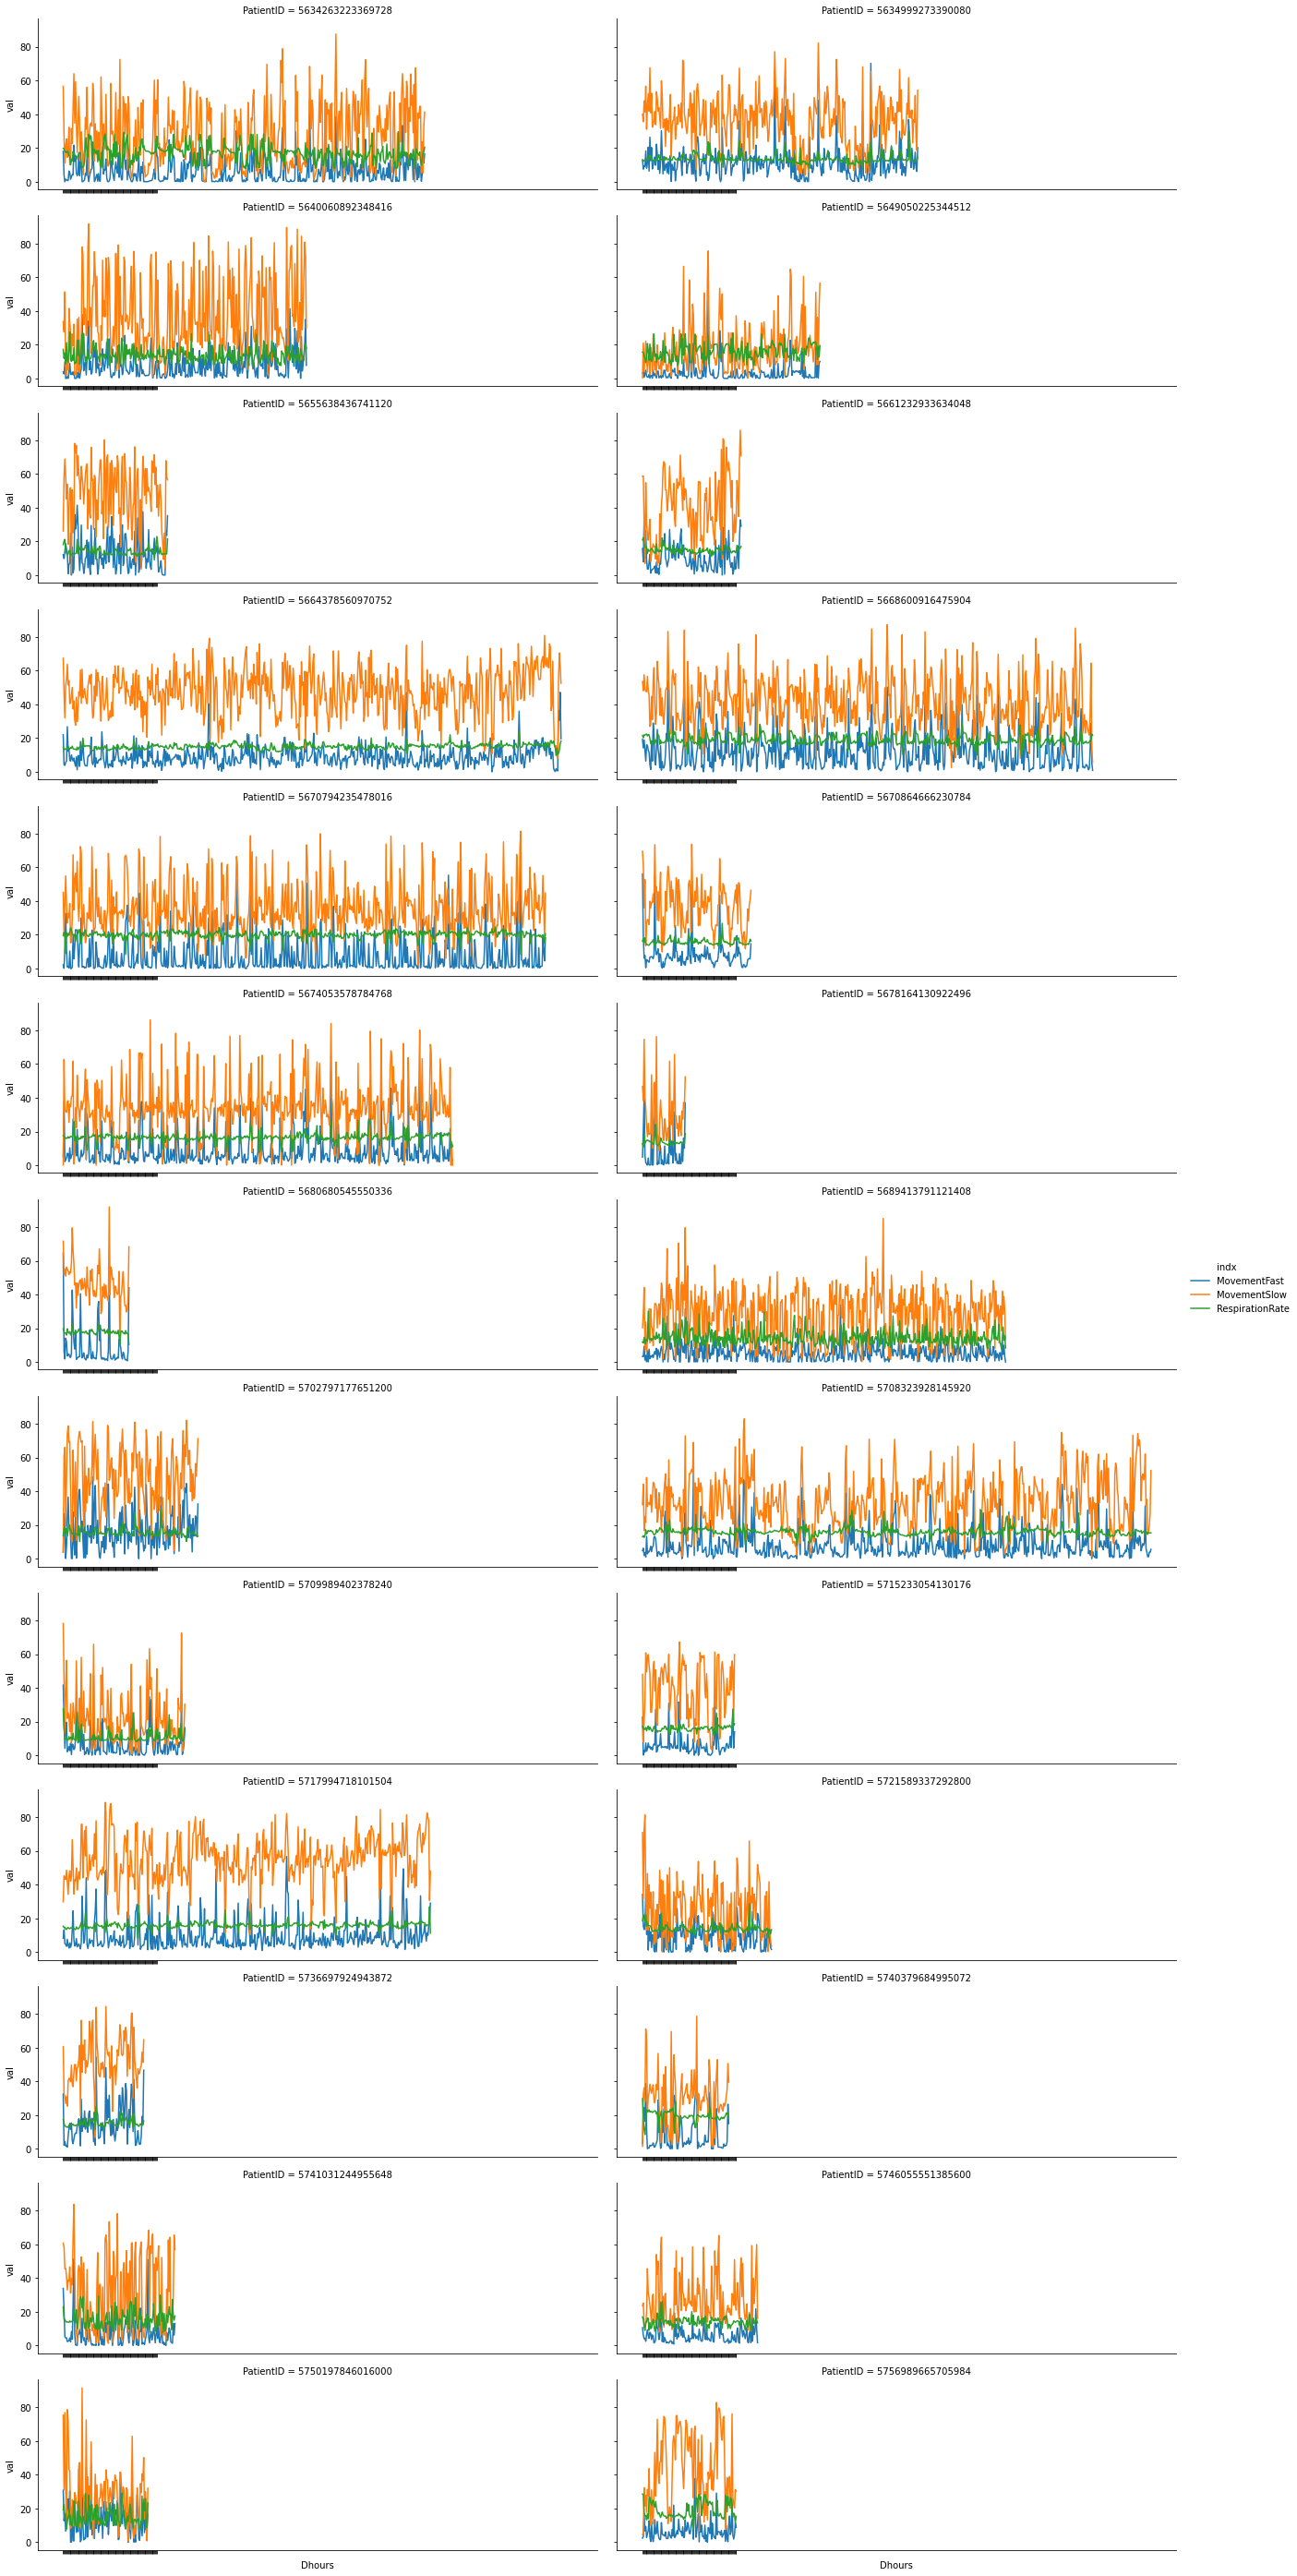

In [24]:
m_dfDhours = melt(dfDhours, col_vals=['MovementFast', 'MovementSlow',
       'RespirationRate'], key='indx', value='val')


g=sns.relplot(x="Dhours", y='val',hue='indx',height=3, aspect=3,
              col="PatientID", data=m_dfDhours,col_wrap=2, kind="line")
g.set(xticklabels=[])

In [23]:
query = '''
    select  PatientID, Hours, round(avg(RespirationRate), 2) as RespirationRate
    
    from df
    where StatusCode=0
    group by PatientID,Hours
    order by PatientID,Hours
'''
dfmHours = pd.read_sql_query (query, conn)

query = '''
    select  PatientID, Hours,  round(avg(MovementSlow), 2) as MovementSlow, round(avg(MovementFast), 2) as MovementFast
    
    from df
    where StatusCode=1
    group by PatientID,Hours
    order by PatientID,Hours
'''
dfrHours = pd.read_sql_query (query, conn)

dfHours= dfrHours.merge(dfmHours, on=['PatientID','Hours'])

In [24]:
import csv
dfHours.to_csv (r'C:\Users\chunxiacao\keenly\keenhours.csv', index = None, header=True)

In [376]:
dfHours.columns

Index(['PatientID', 'Hours', 'MovementSlow', 'MovementFast',
       'RespirationRate'],
      dtype='object')

00:00:57.96


<Figure size 7200x7200 with 0 Axes>

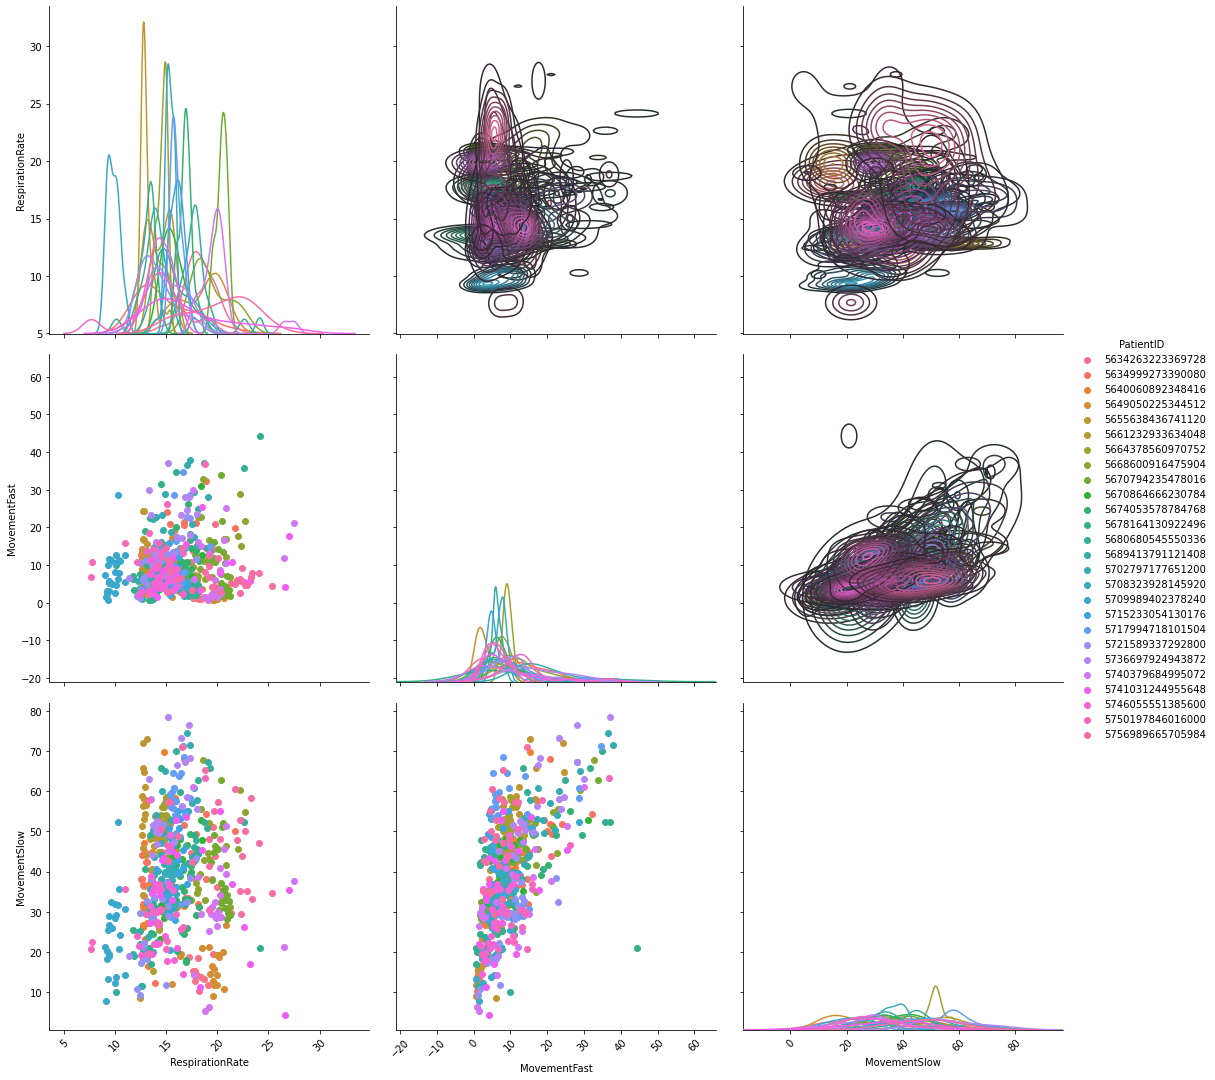

In [25]:
numerical =['RespirationRate',  'MovementFast', 'MovementSlow']
start = time.time()
plt.figure(figsize = (100,100))
g = sns.PairGrid(dfHours, vars=dfHours[numerical], hue="PatientID",height=5, aspect=1) 
g.map_upper(sns.kdeplot) 
g.map_lower(plt.scatter) 
g.map_diag(sns.kdeplot) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_sqlmeanbydate.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

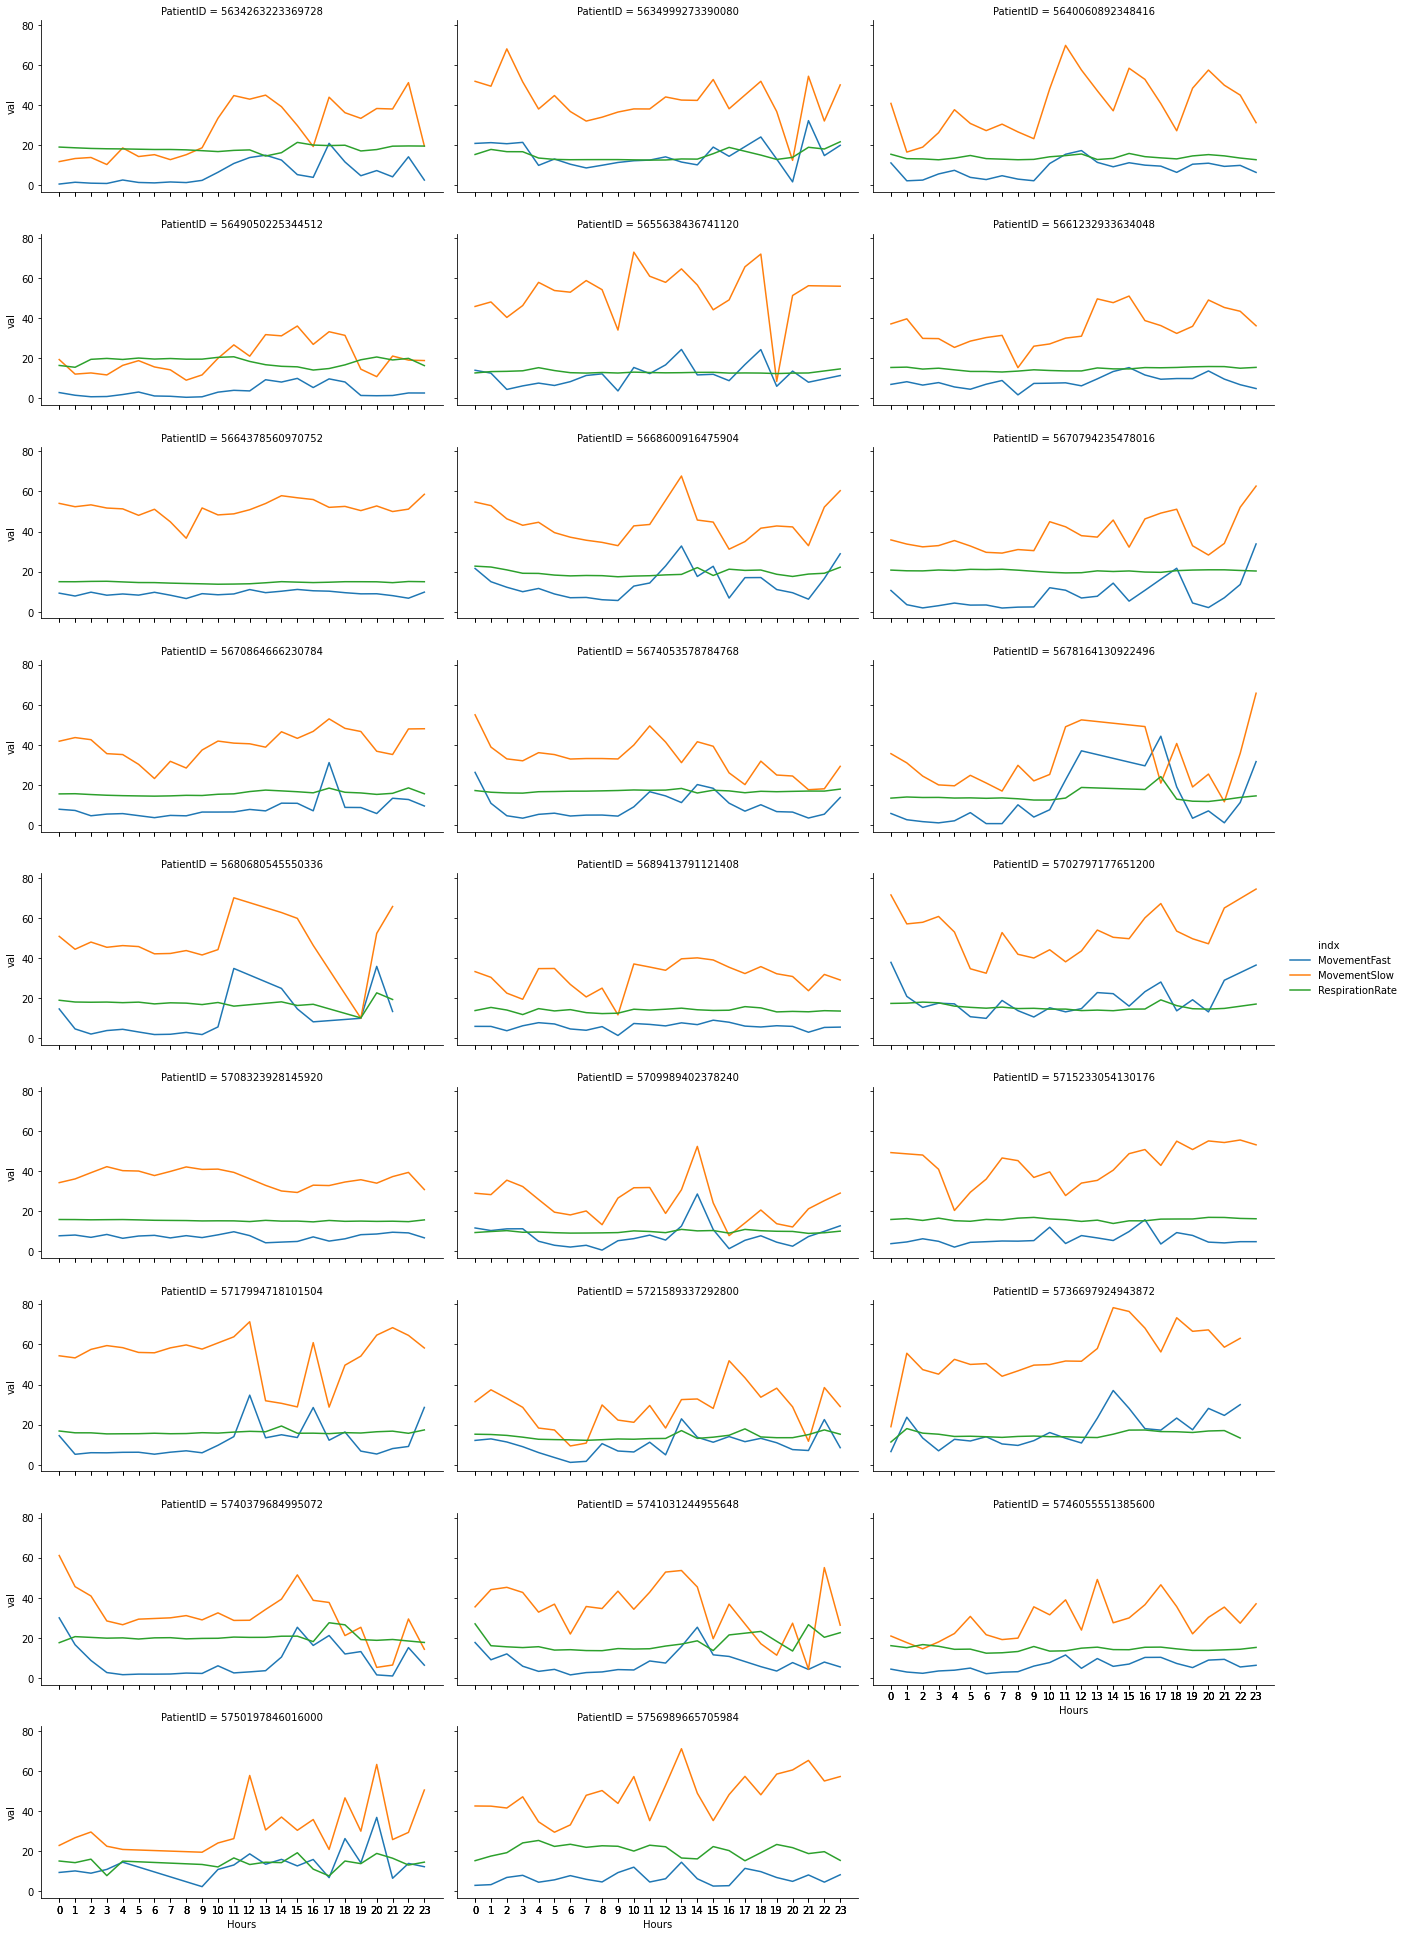

In [26]:
m_dfHours = melt(dfHours, col_vals=['MovementFast', 'MovementSlow',
       'RespirationRate'], key='indx', value='val')


g=sns.relplot(x="Hours", y='val',hue='indx',height=3, aspect=2,
              col="PatientID", data=m_dfHours,col_wrap=3, kind="line").set(xticks=m_dfHours.loc[m_dfHours['PatientID'] == 5634263223369728, 'Hours'].values)

In [372]:
m_dfHours.head()

Hours         PatientID          indx   val
0      0  5634263223369728  MovementFast  0.59
1      1  5634263223369728  MovementFast  1.49
2      2  5634263223369728  MovementFast  1.03
3      3  5634263223369728  MovementFast  0.88
4      4  5634263223369728  MovementFast  2.61

In [27]:
query = '''
    select  PatientID, Mins, round(avg(RespirationRate), 2) as RespirationRate
    
    from df
    where StatusCode=0
    group by PatientID,Mins
    order by PatientID,Mins
'''
dfmMins = pd.read_sql_query (query, conn)

query = '''
    select  PatientID, Mins,  round(avg(MovementSlow), 2) as MovementSlow, round(avg(MovementFast), 2) as MovementFast
    
    from df
    where StatusCode=1
    group by PatientID,Mins
    order by PatientID,Mins
'''
dfrMins = pd.read_sql_query (query, conn)

dfMins= dfrMins.merge(dfmMins, on=['PatientID','Mins'])

In [28]:
dfMins.head()

PatientID   Mins  MovementSlow  MovementFast  RespirationRate
0  5634263223369728  00:00          9.27          0.71            19.72
1  5634263223369728  00:01          4.85          0.07            19.09
2  5634263223369728  00:02          7.12          1.27            19.24
3  5634263223369728  00:03          6.14          0.00            19.79
4  5634263223369728  00:04          6.83          0.18            19.78

In [31]:
dfMins.shape

(29100, 5)

00:01:55.76


<Figure size 7200x7200 with 0 Axes>

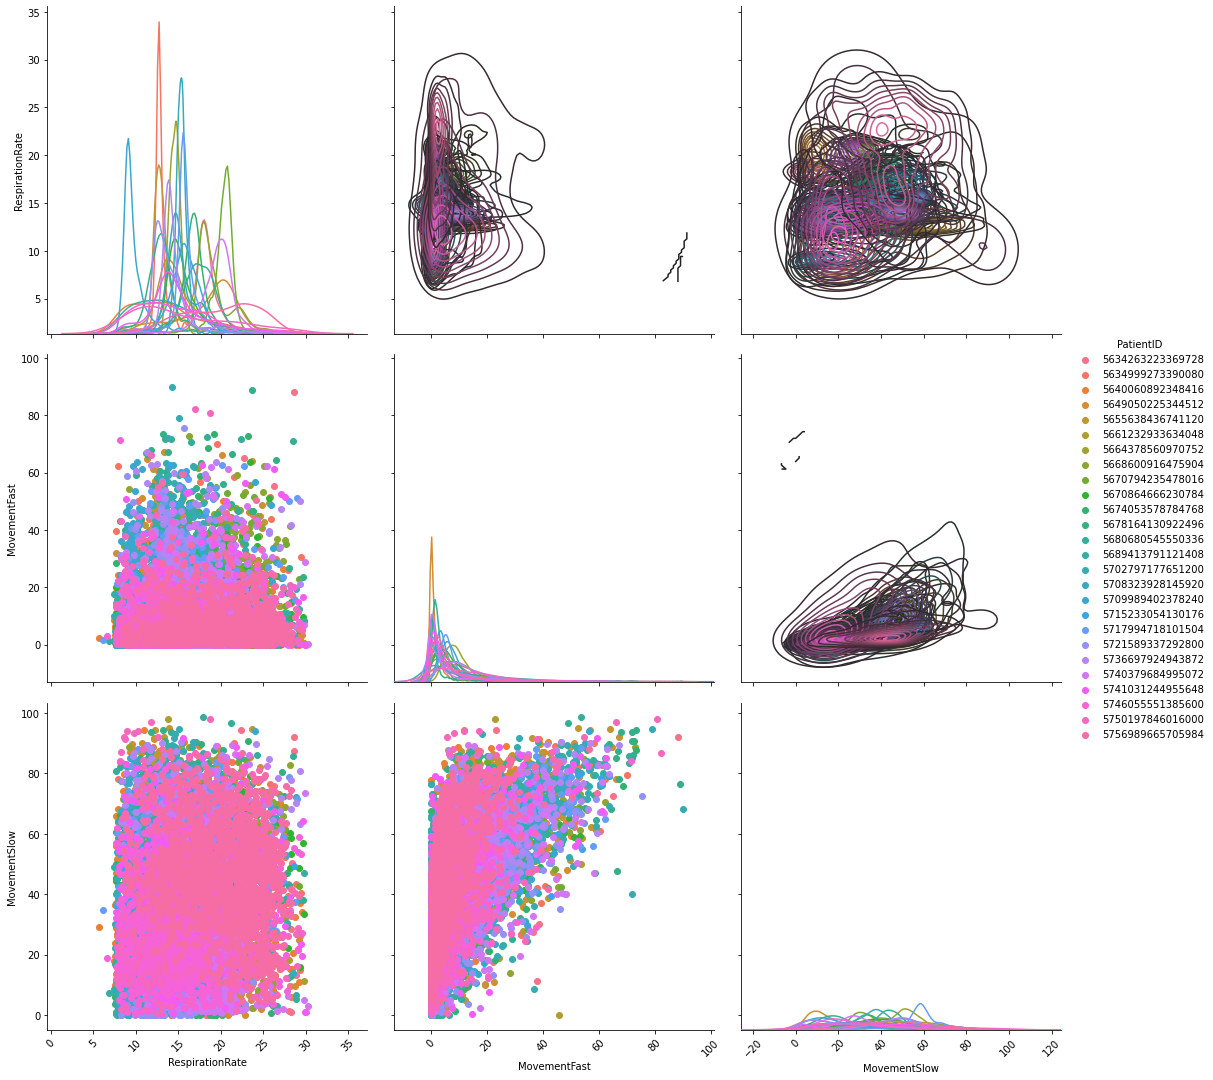

In [29]:
numerical =['RespirationRate', 'MovementFast', 'MovementSlow']
start = time.time()
plt.figure(figsize = (100,100))
g = sns.PairGrid(dfMins, vars=dfMins[numerical], hue="PatientID",height=5, aspect=1) 
g.map_upper(sns.kdeplot) 
g.map_lower(plt.scatter) 
g.map_diag(sns.kdeplot) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_sqlmeanbydate.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

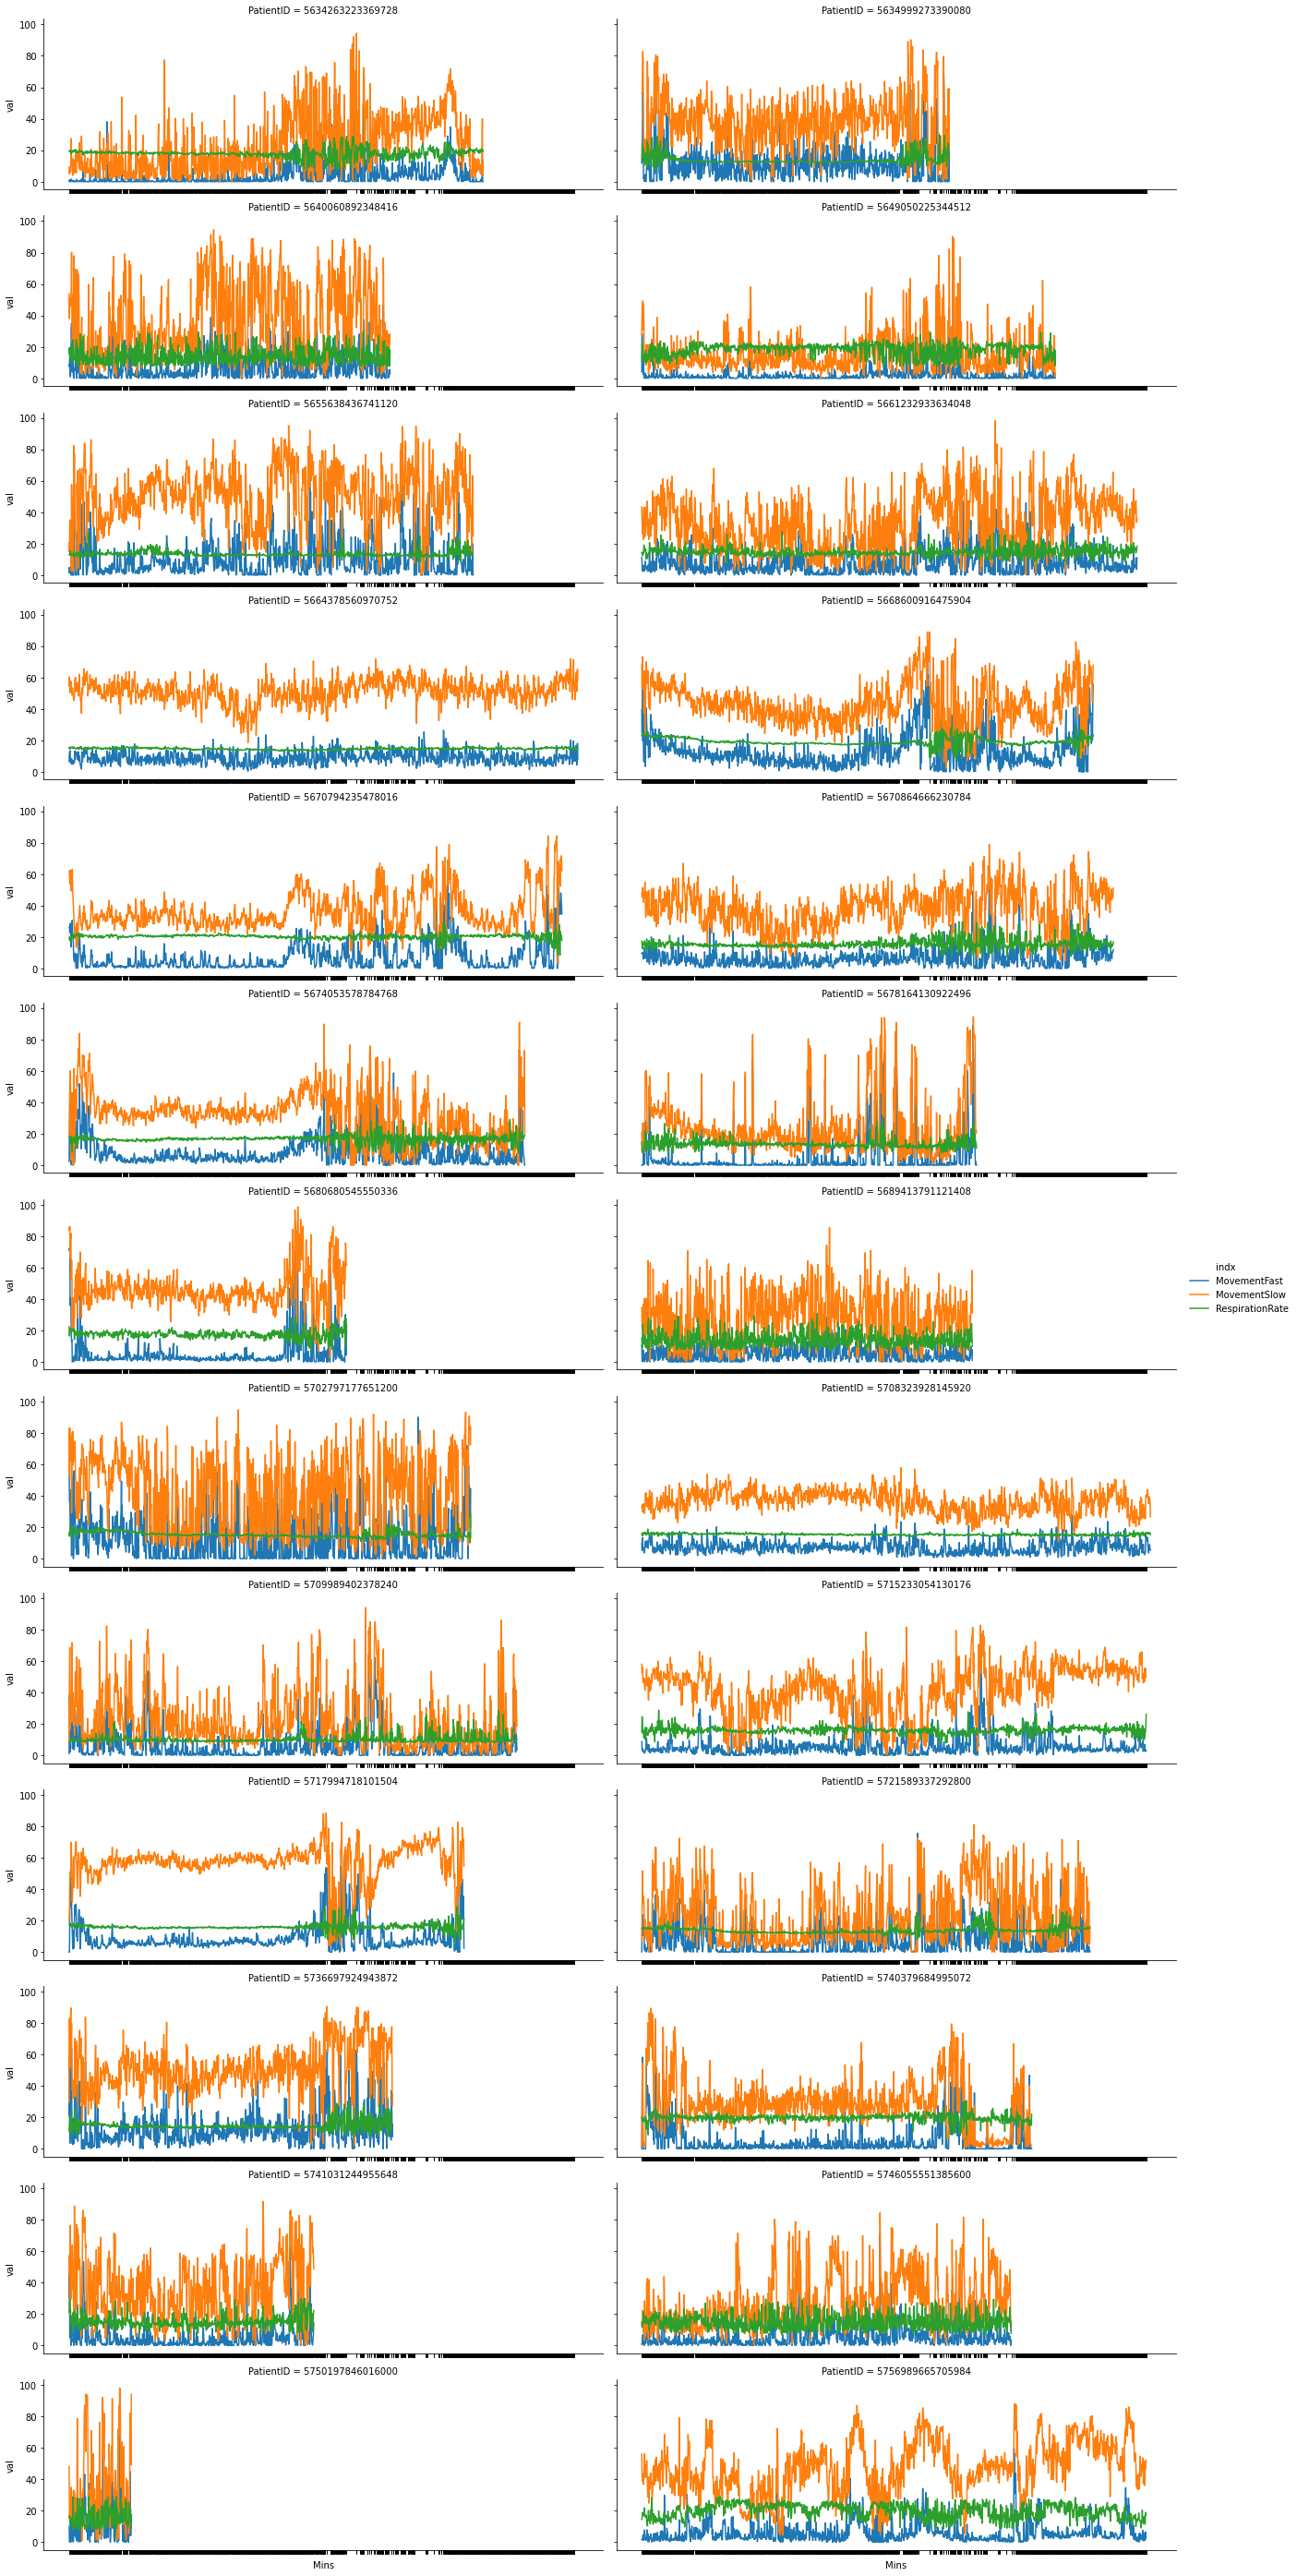

In [26]:
m_dfMins = melt(dfMins, col_vals=['MovementFast', 'MovementSlow',
       'RespirationRate'], key='indx', value='val')


g=sns.relplot(x="Mins", y='val',hue='indx',height=3, aspect=3,
              col="PatientID", data=m_dfMins,col_wrap=2, kind="line").set(xticks=m_dfMins.loc[m_dfMins['PatientID'] == 5634263223369728, 'Mins'].values)
g.set(xticklabels=[])

In [59]:
import matplotlib.pyplot as plt
from fbprophet import Prophet
import altair as alt
import chart_studio.plotly as plotly
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast

def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted
    
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='RespirationRate'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='RespirationRate'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)


In [ ]:
dfd=pd.read_csv('keenDate.csv',header=0)

print(list(set(dfd['PatientID'])))

In [70]:
dfi={}
pred={}
for i, j in enumerate(list(set(dfd['PatientID']))):
    dfi[i]=dfd[dfd['PatientID']==j]
    dfi[i]=dfi[i].rename(columns={"Date": "ds", "DateRespirationRate": "y"})
    pred[i] = fit_predict_model(dfi[i])
    pred[i] = detect_anomalies(pred[i])
    plot_anomalies(pred[i])
    

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbp

In [106]:
plot_anomalies(pred[0])


alt.LayerChart(...)

fig = plt.figure()

plt.subplot(1, 2, 1)
plot_anomalies(pred[0])

plt.subplot(1, 2, 2)
plot_anomalies(pred[1])
plt.show()

In [17]:
df0=dfd[dfd['PatientID']==5634263223369728]
df0=df0.rename(columns={"Date": "ds", "DateRespirationRate": "y"})
pred = fit_predict_model(df0)
pred = detect_anomalies(pred)
plot_anomalies(pred)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


alt.LayerChart(...)

In [110]:
set(dfd['PatientID'])

{5634263223369728,
 5634999273390080,
 5640060892348416,
 5649050225344512,
 5655638436741120,
 5661232933634048,
 5664378560970752,
 5668600916475904,
 5670794235478016,
 5670864666230784,
 5674053578784768,
 5678164130922496,
 5680680545550336,
 5689413791121408,
 5702797177651200,
 5708323928145920,
 5709989402378240,
 5715233054130176,
 5717994718101504,
 5721589337292800,
 5736697924943872,
 5740379684995072,
 5741031244955648,
 5746055551385600,
 5750197846016000,
 5756989665705984}

In [32]:
query = '''
    select  PatientID,Mins, round(avg(MovementFast), 2) as MinsMovementFast, round(avg(MovementSlow), 2) as MinsMovementSlow
    
    from df
    where StatusCode=1
    group by PatientID,Mins
    order by PatientID,Mins
'''
dfmfMins = pd.read_sql_query (query, conn)
### END SOLUTION



query = '''
    select  PatientID,Mins, round(avg(RespirationRate), 2) as MinsRespirationRate
    
    from df
    where StatusCode=0
    group by PatientID,Mins
    order by PatientID,Mins
'''
dfmfMinsr = pd.read_sql_query (query, conn)

In [33]:
dfmerge=dfmfMins.merge(dfmfMinsr,on=['PatientID','Mins'])

In [34]:
dfmerge.isnull().sum()

PatientID              0
Mins                   0
MinsMovementFast       0
MinsMovementSlow       0
MinsRespirationRate    0
dtype: int64

In [35]:
import csv
dfmerge.to_csv (r'C:\Users\chunxiacao\keenly\keenmins.csv', index = None, header=True)

In [106]:
df=pd.read_csv(r'C:\Users\chunxiacao\keenly\keenmins.csv',header=0)

In [37]:
df.head(2)

PatientID   Mins  MinsMovementFast  MinsMovementSlow  \
0  5634263223369728  00:00              0.71              9.27   
1  5634263223369728  00:01              0.07              4.85   

   MinsRespirationRate  
0                19.72  
1                19.09

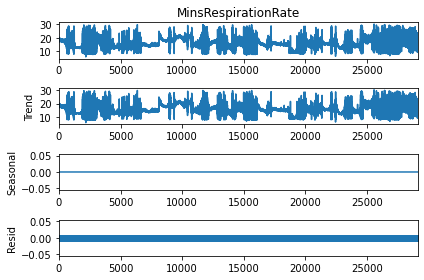

In [115]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['MinsRespirationRate'], model='additive', freq=1)


#plt.figure(figsize=(20,5), dpi=100)
result.plot()
pyplot.show()

In [107]:
df=df.loc[df['PatientID']==5634263223369728, ['Mins','MinsMovementSlow']]

In [108]:
df.shape

(1172, 2)

In [109]:
df['Mins'].min()

'00:00'

In [110]:
df['Mins'].max()

'23:59'

In [111]:
dfindex=df.set_index('Mins')


#train=df.loc[df['PatientID']==5634263223369728, ['Mins','MinsRespirationRate']]
train=dfindex[:992]
test=dfindex[992:]

In [113]:

test.head()

MinsMovementSlow
Mins                   
21:00             33.07
21:01             32.52
21:02             29.67
21:03             38.26
21:04             26.61

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

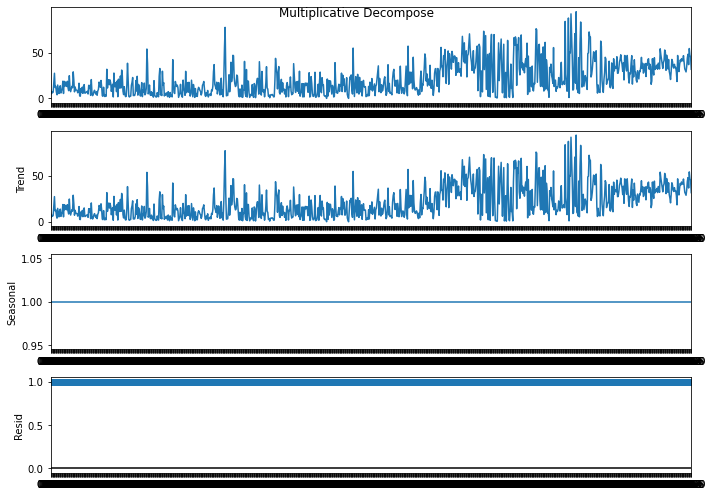

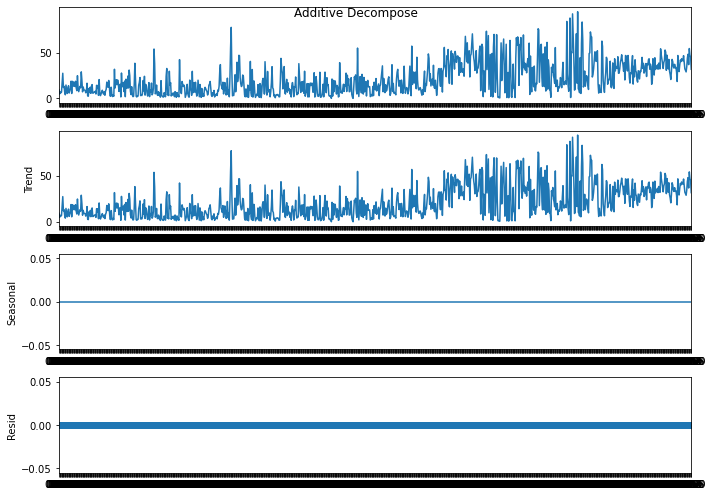

In [114]:
import warnings
warnings.simplefilter('ignore');
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

# Multiplicative Decomposition 
result_mul = seasonal_decompose(train, model='multiplicative', freq=1)

# Additive Decomposition
result_add = seasonal_decompose(train, model='additive', freq=1)

# Plot
plt.rcParams.update({'figure.figsize': (10,7)})
#fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
result_mul.plot().suptitle('Multiplicative Decompose')
result_add.plot().suptitle('Additive Decompose')
plt.show()

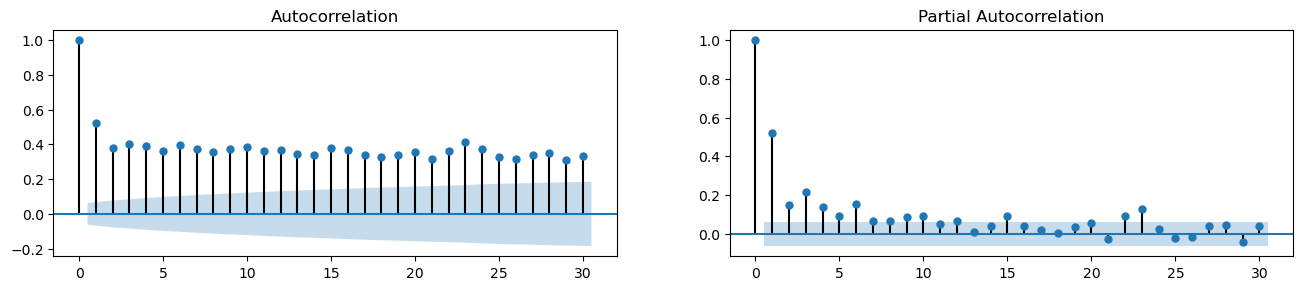

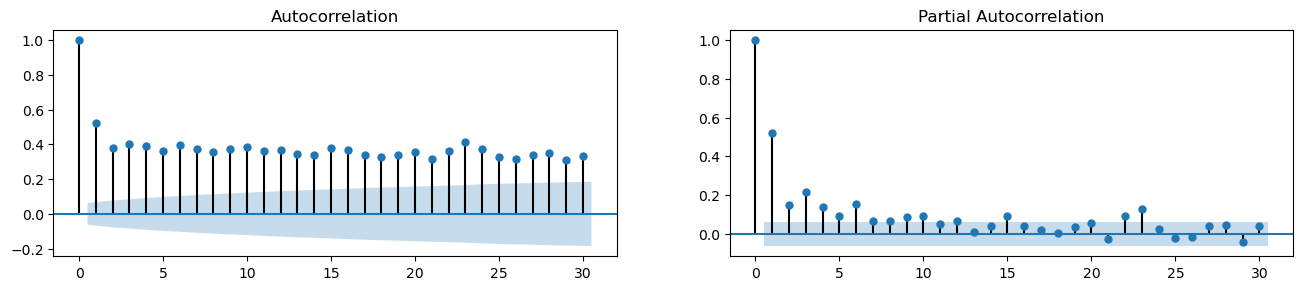

In [115]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train,  ax=axes[0])
plot_pacf(train,  ax=axes[1])

# Plot
plt.rcParams.update({'figure.figsize': (10,7)})
#fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
result_mul.plot().suptitle('Multiplicative Decompose')
result_add.plot().suptitle('Additive Decompose')
plt.show()

In [118]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [119]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9365.262098873978
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8888.436375413561
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8587.3016699662
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:7996.7084961788705
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8475.443221871443
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8086.948757016217
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8209.058963949163
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7998.708103088813
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8813.557724587092
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8527.878676948403
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8512.505032272456
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:7904.295869800219
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8348.926148912808
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:7992.819851667308
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8155.3352845985
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:7906.2819329044105
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8413.12745743741
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8321.968640363171
ARIMA(0, 1, 0

In [120]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2253      0.025      9.194      0.000       0.177       0.273
ma.L1         -0.9562      0.009   -103.624      0.000      -0.974      -0.938
ar.S.L12    8.769e-05      0.024      0.004      0.997      -0.047       0.047
ma.S.L12      -0.9913      0.025    -40.381      0.000      -1.039      -0.943
sigma2       186.8966      6.706     27.871      0.000     173.754     200.040


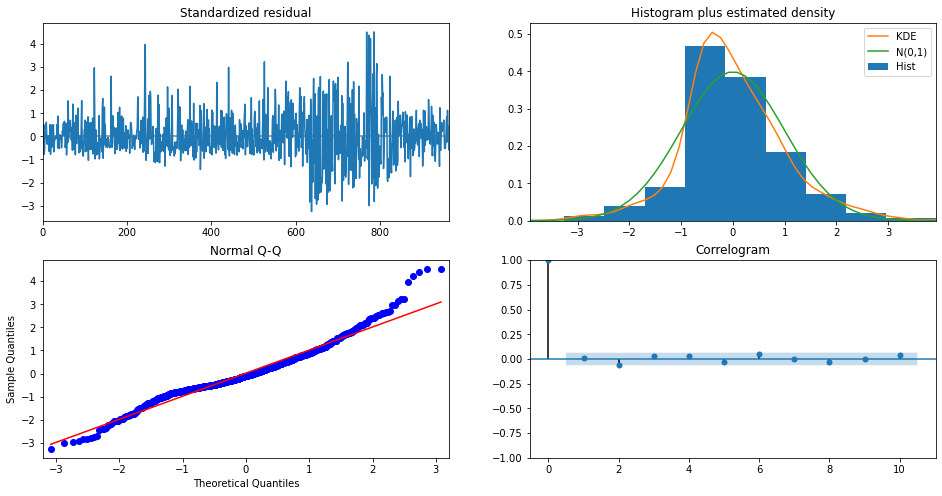

In [121]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

                             ARIMA Model Results                              
Dep. Variable:     D.MinsMovementSlow   No. Observations:                  991
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3988.425
Method:                       css-mle   S.D. of innovations             13.527
Date:                Sun, 19 Apr 2020   AIC                           7984.851
Time:                        17:41:04   BIC                           8004.446
Sample:                             1   HQIC                          7992.302
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0282      0.024      1.190      0.234      -0.018       0.075
ar.L1.D.MinsMovementSlow     0.2269      0.034      6.755      0.000       0.161       0.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


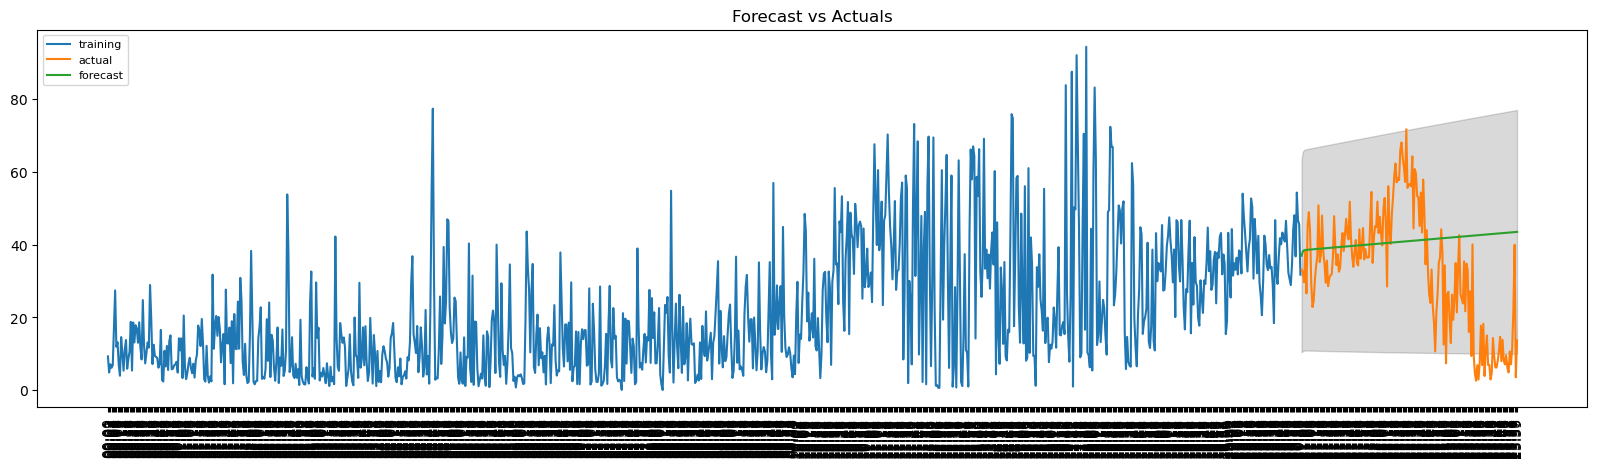

Test MSE: 370.708


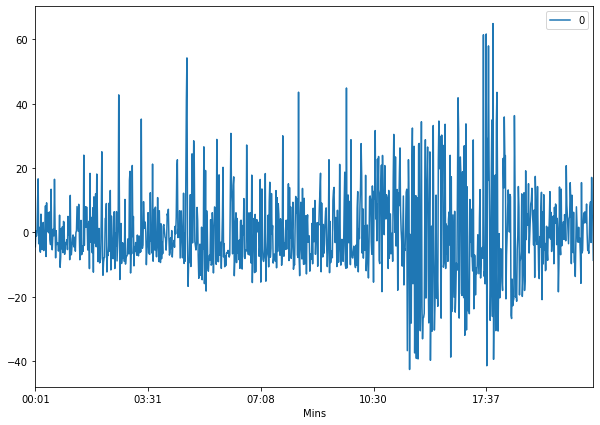

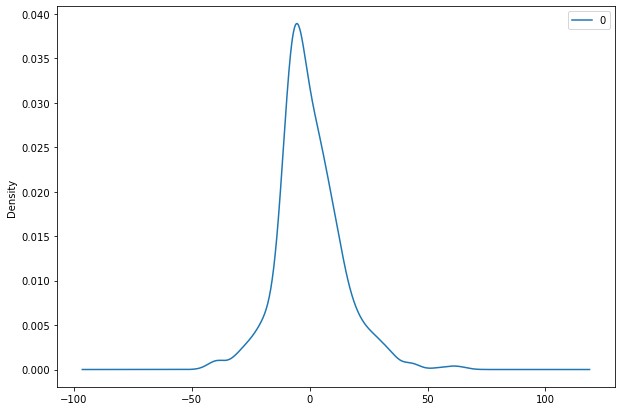

                0
count  991.000000
mean     0.009237
std     13.535873
min    -42.643310
25%     -7.673259
50%     -1.899959
75%      6.844899
max     64.943546


In [122]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=False)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(180, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation=90)
plt.show()
from sklearn.metrics import mean_squared_error
# plot residual errors
from matplotlib import pyplot
error = mean_squared_error(test, fc_series)
print('Test MSE: %.3f' % error)
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [123]:
query = '''
    select   Date, round(avg(MovementSlow), 2) as DateMovementSlow
    
    from df
    where StatusCode=0
    group by Date
    order by Date
'''
dfDatet = pd.read_sql_query (query, conn)
dfDatet.head(2)

Date  DateMovementSlow
0  2019-12-21             14.54
1  2019-12-22             12.55

In [124]:
df=dfDatet.copy()
df.head(2)

Date  DateMovementSlow
0  2019-12-21             14.54
1  2019-12-22             12.55

In [125]:
dfindex=df.set_index('Date')



#train=df.loc[df['PatientID']==5634263223369728, ['Mins','MinsRespirationRate']]
train=dfindex[:27]
test=dfindex[27:]

In [126]:
import warnings
warnings.simplefilter('ignore');
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

# Multiplicative Decomposition 
result_mul = seasonal_decompose(train, model='multiplicative', freq=1)

# Additive Decomposition
result_add = seasonal_decompose(train, model='additive', freq=1)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

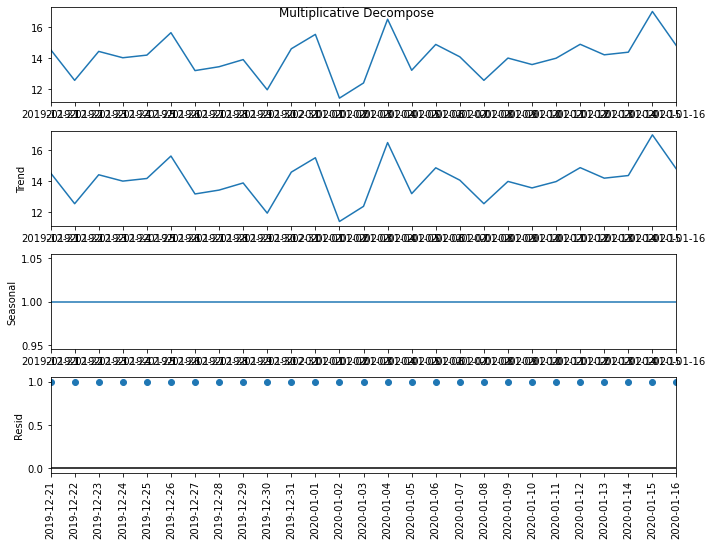

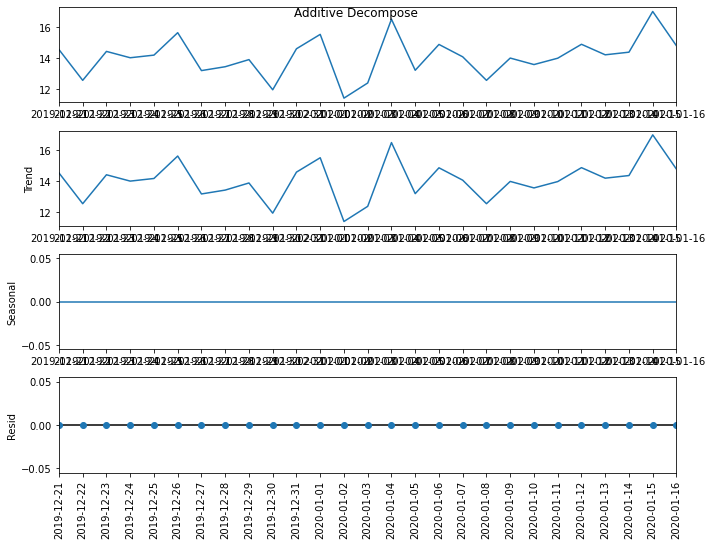

In [127]:
# Plot
plt.rcParams.update({'figure.figsize': (10,7)})
#fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
result_mul.plot().suptitle('Multiplicative Decompose')
plt.xticks(rotation=90)
result_add.plot().suptitle('Additive Decompose')
plt.xticks(rotation=90)
plt.show()

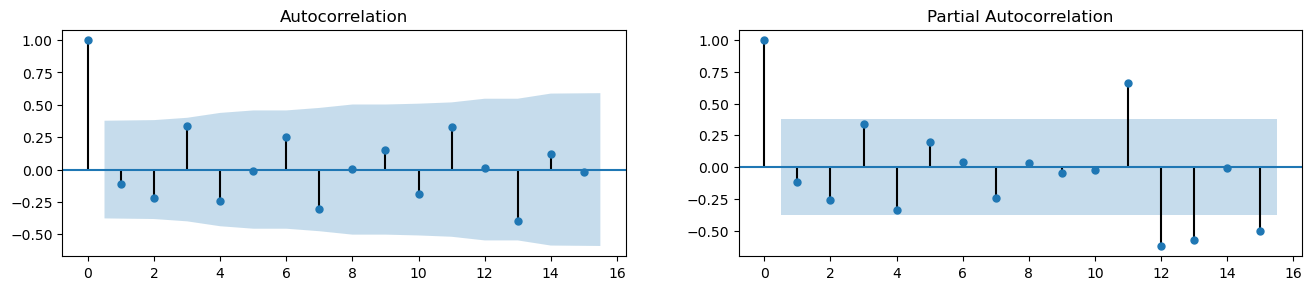

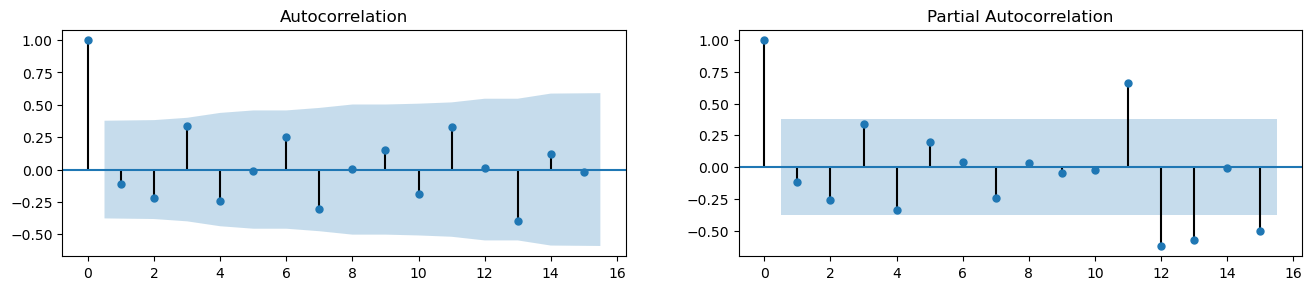

In [128]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train, ax=axes[0])
plot_pacf(train,  ax=axes[1])

In [129]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:213.38560967764053
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:116.25851545398021
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:58.935243071743564
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:14.381244629716083
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:66.73523424619967
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:61.83786756115964
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:18.19620762755052
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:16.27416944335436
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:177.8514752286011
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:96.14216061521623
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:57.76525695678623
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-2.63300237547797
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:68.59423645859945
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:60.02592313540779
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:20.18989147650212
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-5.3277898805709505
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:105.20970589791582
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:57.625126925092864
AR

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

In [130]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1,1, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6839   1.65e-10  -4.15e+09      0.000      -0.684      -0.684
ar.S.L12      -1.2173   1.34e-10  -9.08e+09      0.000      -1.217      -1.217
ma.S.L12       1.7090   5.78e-15   2.96e+14      0.000       1.709       1.709
sigma2      4.537e-08   1.46e-07      0.310      0.756   -2.41e-07    3.32e-07


#How to interpret the residual plots in ARIMA model
results.plot_diagnostics(figsize=(7,5))
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

                              ARMA Model Results                              
Dep. Variable:       DateMovementSlow   No. Observations:                   27
Model:                     ARMA(1, 1)   Log Likelihood                 -43.835
Method:                       css-mle   S.D. of innovations              1.193
Date:                Sun, 19 Apr 2020   AIC                             95.671
Time:                        18:12:47   BIC                            100.854
Sample:                    12-21-2019   HQIC                            97.212
                         - 01-16-2020                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     13.9847      0.099    141.554      0.000      13.791      14.178
ar.L1.DateMovementSlow     0.7690      0.189      4.064      0.000       0.398       1.140
ma.L

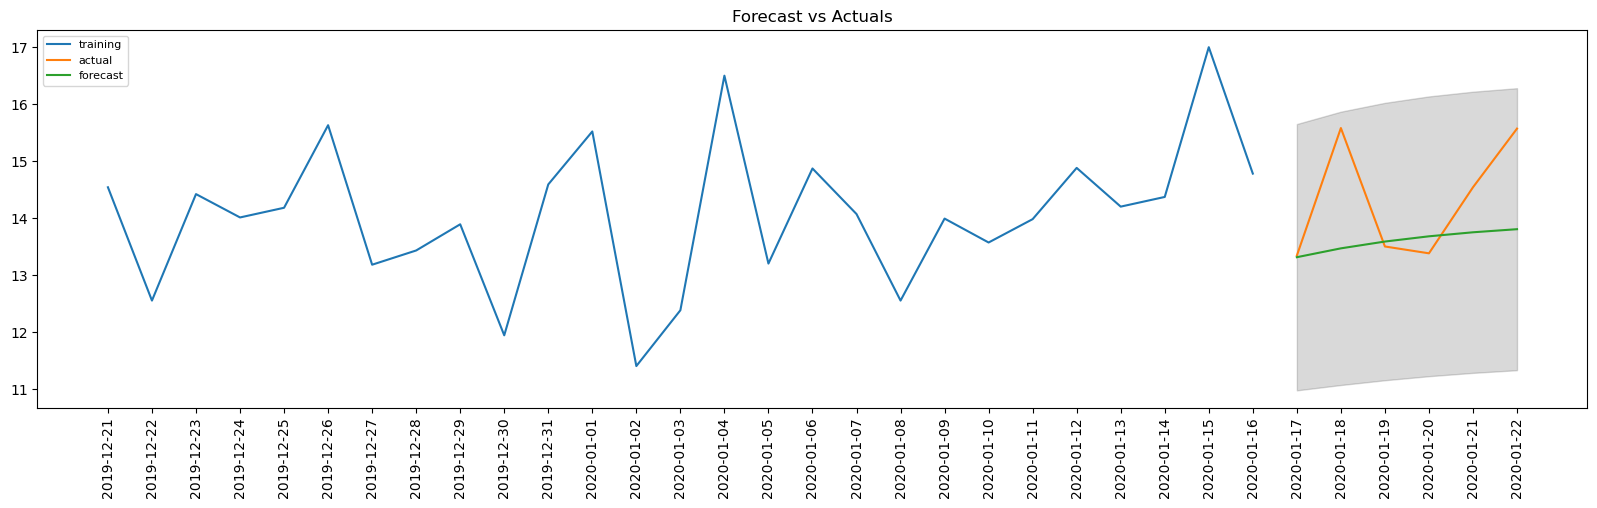

Test MSE: 1.384


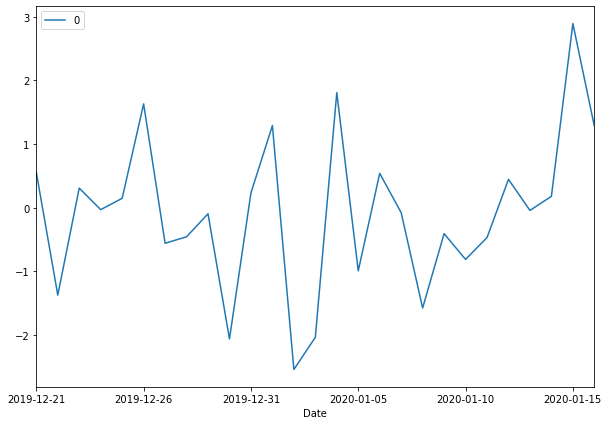

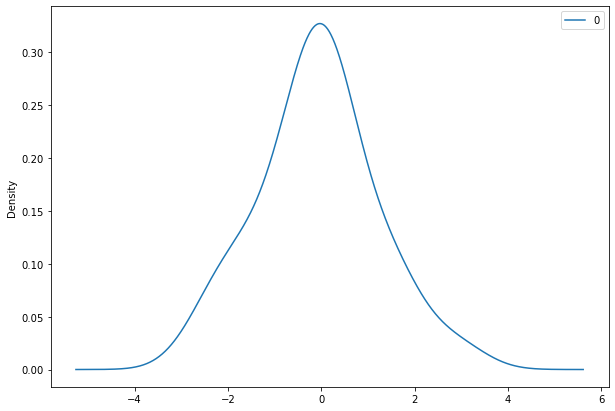

               0
count  27.000000
mean   -0.080232
std     1.243440
min    -2.539325
25%    -0.683191
50%    -0.040477
75%     0.494410
max     2.893986


In [152]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 0, 1))  
fitted = model.fit(disp=False)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(6, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation=90)
plt.show()
from sklearn.metrics import mean_squared_error
# plot residual errors
from matplotlib import pyplot
error = mean_squared_error(test, fc_series)
print('Test MSE: %.3f' % error)
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Actual vs Fitted
fitted.plot_predict(dynamic=False)
plt.show()

In [132]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
   
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 1.8754990021298343,
 'me': 26.666375935978316,
 'mae': 26.666375935978316,
 'mpe': 1.8754990021298343,
 'rmse': 26.72579301974134}

In [134]:
import matplotlib.pyplot as plt
from fbprophet import Prophet
import altair as alt
import chart_studio.plotly as plotly
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast

def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted
    
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='MovementSlow'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='MovementSlow'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)

In [141]:
df0.head()

ds      y
0  2019-12-21  14.54
1  2019-12-22  12.55
2  2019-12-23  14.42
3  2019-12-24  14.01
4  2019-12-25  14.18

In [135]:

df0=df.rename(columns={"Date": "ds", "DateMovementSlow": "y"})
pred = fit_predict_model(df0)
pred = detect_anomalies(pred)
plot_anomalies(pred)

alt.LayerChart(...)

In [142]:
df0.to_csv (r'C:\Users\chunxiacao\keenly\keenmoveslow.csv', index = None, header=True)

In [143]:
df=pd.read_csv('keenmoveslow.csv',header=0)

In [144]:
df

ds      y
0   2019-12-21  14.54
1   2019-12-22  12.55
2   2019-12-23  14.42
3   2019-12-24  14.01
4   2019-12-25  14.18
5   2019-12-26  15.63
6   2019-12-27  13.18
7   2019-12-28  13.43
8   2019-12-29  13.89
9   2019-12-30  11.94
10  2019-12-31  14.59
11  2020-01-01  15.52
12  2020-01-02  11.40
13  2020-01-03  12.38
14  2020-01-04  16.50
15  2020-01-05  13.20
16  2020-01-06  14.87
17  2020-01-07  14.07
18  2020-01-08  12.55
19  2020-01-09  13.99
20  2020-01-10  13.57
21  2020-01-11  13.98
22  2020-01-12  14.88
23  2020-01-13  14.20
24  2020-01-14  14.37
25  2020-01-15  17.00
26  2020-01-16  14.78
27  2020-01-17  13.34
28  2020-01-18  15.58
29  2020-01-19  13.50
30  2020-01-20  13.38
31  2020-01-21  14.54
32  2020-01-22  15.57

In [145]:
import fbprophet
#df1=df.rename(columns={"Date": "ds", "DateMovementSlow": "y"})
# Make the prophet model and fit on the data
#df_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
df_prophet = fbprophet.Prophet()
df_prophet.fit(df)
df_prophet.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Exception: Prophet object can only be fit once. Instantiate a new object.

In [146]:
# Make a future dataframe for 2 years
df_forecast = df_prophet.make_future_dataframe(periods=1 * 14, freq='D')
# Make predictions
df_forecast = df_prophet.predict(df_forecast)

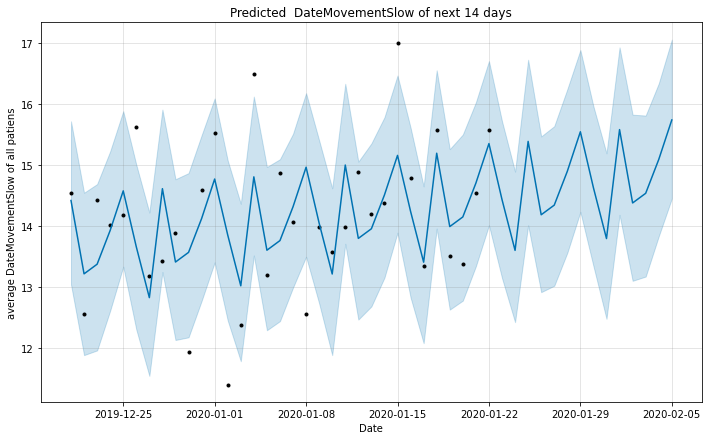

In [149]:
df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = 'average DateMovementSlow of all patiens')
plt.title('Predicted  DateMovementSlow of next 14 days');

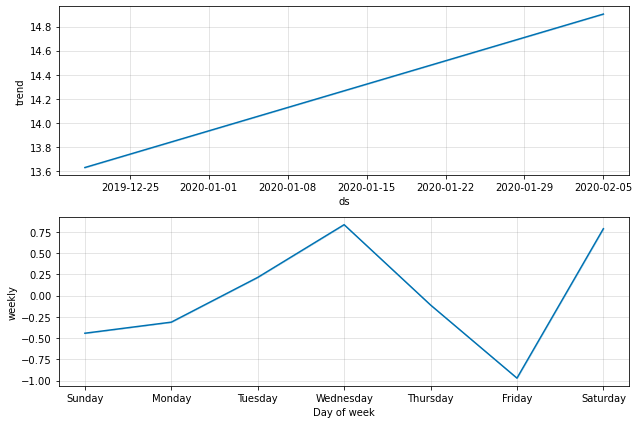

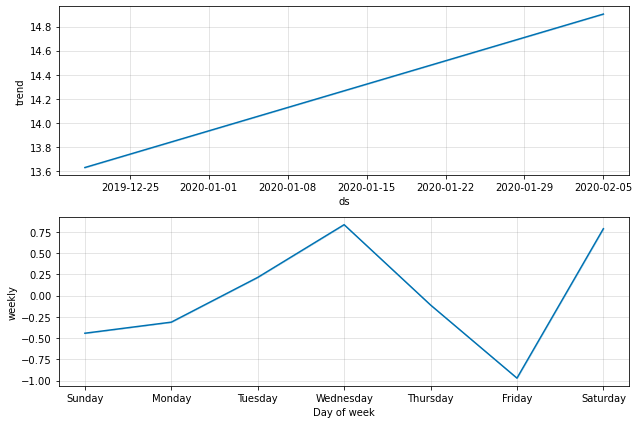

In [150]:
# Plot the trends and patterns
df_prophet.plot_components(df_forecast)